This file includes data visualization using health checkup data.

# 1. EDA

## 1-1. Install package/ Import Library

In [83]:
!pip install koreanize-matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image, display
import koreanize_matplotlib

## 1-2. Load Data

In [84]:
# Use encoding="cp949" when loading a CSV file encoded in Korean
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/NHIS_OPEN_GJ_2017.CSV.zip",
                 encoding="cp949")

## ✔ df.shape

: returns the number of rows and columns in the DataFrame as a tuple.

In [85]:
df.shape

(1000000, 34)

There are 1000000 rows and 34 columns in the dataset

## ✔ df.head

: returns the first five rows of the dataset

In [86]:
df.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,13,46,170.0,65.0,91.0,1.0,1.2,...,25.0,3.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
1,2017,2,2,8,41,150.0,45.0,73.4,1.2,1.0,...,10.0,1.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
2,2017,3,1,8,45,175.0,75.0,94.0,1.0,0.8,...,136.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
3,2017,4,2,12,11,155.0,55.0,67.5,0.9,1.0,...,30.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
4,2017,5,1,8,41,175.0,75.0,93.0,1.5,1.5,...,68.0,3.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126


## ✔ df.tail

: returns the last five rows of the dataset

In [87]:
df.tail()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
999995,2017,999996,2,9,41,165.0,55.0,70.0,1.5,1.5,...,11.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
999996,2017,999997,2,9,11,165.0,50.0,68.0,1.2,1.5,...,11.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
999997,2017,999998,2,12,27,155.0,50.0,83.8,0.2,1.0,...,12.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
999998,2017,999999,1,11,47,160.0,70.0,99.0,0.8,0.9,...,35.0,2.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
999999,2017,1000000,2,9,27,165.0,60.0,74.0,1.2,1.2,...,15.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126


## ✔ df.info()

  : The df.info() method in pandas provides a concise summary of a DataFrame, which is helpful for getting an overview of the data structure.

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     999738 non-null   float64
 6   체중(5Kg 단위)    999732 non-null   float64
 7   허리둘레          999560 non-null   float64
 8   시력(좌)         999712 non-null   float64
 9   시력(우)         999721 non-null   float64
 10  청력(좌)         999758 non-null   float64
 11  청력(우)         999757 non-null   float64
 12  수축기혈압         999924 non-null   float64
 13  이완기혈압         999923 non-null   float64
 14  식전혈당(공복혈당)    999957 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999957 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

## ✔ df.columns

: returns column names of the dataset.

In [89]:
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상',
       '치석', '데이터공개일자'],
      dtype='object')

## ✔ df.dtypes

: returns the data types of the columns in the dataset.

In [90]:
df.dtypes

,0
기준년도,int64
가입자일련번호,int64
성별코드,int64
연령대코드(5세단위),int64
시도코드,int64
신장(5Cm단위),float64
체중(5Kg 단위),float64
허리둘레,float64
시력(좌),float64
시력(우),float64


## ✔ df.sample

: returns a random sample of the data from the dataset.

In [91]:
df.sample(5)

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
139735,2017,139736,1,6,48,180.0,70.0,80.0,1.2,1.0,...,16.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
975649,2017,975650,1,7,29,165.0,55.0,74.0,0.6,0.9,...,16.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
463678,2017,463679,1,10,44,170.0,65.0,74.0,1.0,1.5,...,27.0,2.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
359501,2017,359502,1,13,41,160.0,70.0,94.0,1.0,0.8,...,77.0,2.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
99249,2017,99250,1,12,26,160.0,70.0,88.0,0.6,1.0,...,61.0,2.0,1.0,1,NaN,NaN,NaN,NaN,1.0,20181126


## 1-3. Check null data

## ✔ df.isnull()

: returns null values in each column of the dataset.

### ✔ df.isnull().sum()

: returns the number of null values in each column of the dataset.

In [92]:
# Calculate the number of null values in each column
null_counts = df.isnull().sum().sort_values(ascending = False)
null_counts

,0
결손치유무,1000000
제3대구치(사랑니)이상,1000000
치아마모증유무,1000000
치아우식증유무,1000000
치석,601252
요단백,4859
LDL콜레스테롤,2899
음주여부,525
허리둘레,440
시력(좌),288


## ✔ df.loc[:, condition]

: returns the rows of the dataset where the condition is met, across all columns.

In [93]:
# Filter the DataFrame to include only columns with less than 10000 null values
df_filtered = df.loc[:, null_counts < 1000000]
df_filtered

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진 수검여부,치석,데이터공개일자
0,2017,1,1,13,46,170.0,65.0,91.0,1.0,1.2,...,1.0,1.0,19.0,41.0,25.0,3.0,0.0,1,1.0,20181126
1,2017,2,2,8,41,150.0,45.0,73.4,1.2,1.0,...,1.0,0.9,16.0,13.0,10.0,1.0,0.0,1,1.0,20181126
2,2017,3,1,8,45,175.0,75.0,94.0,1.0,0.8,...,1.0,1.1,45.0,62.0,136.0,1.0,0.0,1,0.0,20181126
3,2017,4,2,12,11,155.0,55.0,67.5,0.9,1.0,...,1.0,0.6,21.0,24.0,30.0,1.0,1.0,0,NaN,20181126
4,2017,5,1,8,41,175.0,75.0,93.0,1.5,1.5,...,1.0,1.1,37.0,62.0,68.0,3.0,0.0,0,NaN,20181126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2017,999996,2,9,41,165.0,55.0,70.0,1.5,1.5,...,1.0,1.1,18.0,11.0,11.0,1.0,1.0,0,NaN,20181126
999996,2017,999997,2,9,11,165.0,50.0,68.0,1.2,1.5,...,1.0,0.8,21.0,11.0,11.0,1.0,0.0,1,0.0,20181126
999997,2017,999998,2,12,27,155.0,50.0,83.8,0.2,1.0,...,1.0,0.8,23.0,13.0,12.0,1.0,0.0,1,0.0,20181126
999998,2017,999999,1,11,47,160.0,70.0,99.0,0.8,0.9,...,1.0,0.9,28.0,30.0,35.0,2.0,1.0,0,NaN,20181126


<Axes: >

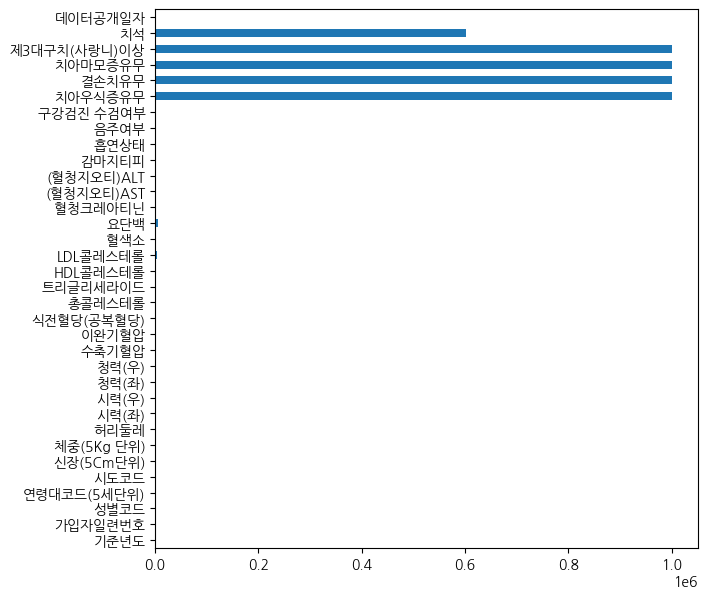

In [94]:
df.isnull().sum().plot.barh(figsize=(7,7))

## ✔ df.isna()

:returns null values in each column of the dataset.

### ✔ df.isna().sum()

: returns null values in each column of the dataset.

In [95]:
df.isna().sum().sort_values(ascending = False)

,0
결손치유무,1000000
제3대구치(사랑니)이상,1000000
치아마모증유무,1000000
치아우식증유무,1000000
치석,601252
요단백,4859
LDL콜레스테롤,2899
음주여부,525
허리둘레,440
시력(좌),288


In [96]:
# Count data by gender
df.value_counts('성별코드')

,count
성별코드,
1,531172
2,468828


In [97]:
# Count data by smoking
df.value_counts('흡연상태')

,count
흡연상태,
1.0,608587
3.0,215061
2.0,176192


In [98]:
# Group data by gender and count the number of occurrences in each group
df.groupby('성별코드').size()

,0
성별코드,
1,531172
2,468828


In [99]:
df.groupby('성별코드').count()

,기준년도,가입자일련번호,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
성별코드,,,,,,,,,,,,,,,,,,,,,
1,531172,531172,531172,531172,531098,531098,531102,531047,531055,531064,...,531154,531120,530976,531172,0,0,0,0,230156,531172
2,468828,468828,468828,468828,468640,468634,468458,468665,468666,468694,...,468801,468720,468499,468828,0,0,0,0,168592,468828


In [100]:
# Group data by both gender and drinking
df.groupby(['성별코드', '음주여부']).count()

기준년도  가입자일련번호  연령대코드(5세단위)    시도코드  신장(5Cm단위)  체중(5Kg 단위)  \
성별코드 음주여부                                                                
1    0.0   175150   175150       175150  175150     175092      175092   
     1.0   355826   355826       355826  355826     355811      355811   
2    0.0   327579   327579       327579  327579     327406      327400   
     1.0   140920   140920       140920  140920     140906      140906   

             허리둘레   시력(좌)   시력(우)   청력(좌)  ...  (혈청지오티)ALT   감마지티피    흡연상태  \
성별코드 음주여부                                  ...                               
1    0.0   175105  175070  175069  175076  ...      175139  175139  175140   
     1.0   355802  355781  355790  355792  ...      355820  355819  355796   
2    0.0   327240  327431  327433  327460  ...      327559  327559  327542   
     1.0   140891  140905  140904  140905  ...      140913  140913  140892   

           구강검진 수검여부  치아우식증유무  결손치유무  치아마모증유무  제3대구치(사랑니)이상      치석  데이터공개일자  
성별코드 음주여부                                                                     
1    0.0      175150        0      0        0             0   68982   175150  
     1.0      355826        0      0        0             0  161098   355826  
2    0.0      327579        0      0        0             0  111381   327579  
     1.0      140920        0      0        0             0   57101   140920  

[4 rows x 32 columns]

In [101]:
# Group specified data by bith gender and drinking
df.groupby(['성별코드', '음주여부'])['감마지티피'].agg(np.mean)

<ipython-input-101-33552ee69552>:2: FutureWarning: The provided callable <function mean at 0x7ebac1f17d90> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby(['성별코드', '음주여부'])['감마지티피'].agg(np.mean)


성별코드  음주여부
1     0.0     34.710544
      1.0     56.707919
2     0.0     22.660238
      1.0     25.115149
Name: 감마지티피, dtype: float64

In [102]:
df.groupby(['성별코드', '음주여부'])['감마지티피'].describe()

count       mean        std  min   25%   50%   75%    max
성별코드 음주여부                                                              
1    0.0   175139.0  34.710544  37.715218  1.0  18.0  25.0  38.0  999.0
     1.0   355819.0  56.707919  69.039084  1.0  24.0  37.0  63.0  999.0
2    0.0   327559.0  22.660238  25.181300  1.0  13.0  17.0  24.0  999.0
     1.0   140913.0  25.115149  35.870812  1.0  13.0  17.0  25.0  999.0

In [103]:
df.groupby(['성별코드', '음주여부'])['감마지티피'].agg(np.max)

<ipython-input-103-66f220d43ab1>:1: FutureWarning: The provided callable <function max at 0x7ebac1f17490> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df.groupby(['성별코드', '음주여부'])['감마지티피'].agg(np.max)


성별코드  음주여부
1     0.0     999.0
      1.0     999.0
2     0.0     999.0
      1.0     999.0
Name: 감마지티피, dtype: float64

In [104]:
df.pivot_table(index = '음주여부', aggfunc = 'size')

,0
음주여부,
0.0,502729
1.0,496746


In [105]:
df.pivot_table(index = '음주여부')

,(혈청지오티)ALT,(혈청지오티)AST,HDL콜레스테롤,LDL콜레스테롤,가입자일련번호,감마지티피,구강검진 수검여부,기준년도,데이터공개일자,성별코드,...,청력(우),청력(좌),체중(5Kg 단위),총콜레스테롤,치석,트리글리세라이드,허리둘레,혈색소,혈청크레아티닌,흡연상태
음주여부,,,,,,,,,,,,,,,,,,,,,
0.0,24.107862,25.094792,56.161852,114.467632,499800.113284,26.858541,0.358768,2017.0,20181126.0,1.651602,...,1.041086,1.042881,60.082827,194.699007,0.573111,122.063887,80.269019,13.748950,0.837132,1.320330
1.0,27.634991,27.069879,57.606351,111.444394,500196.825986,47.745678,0.439257,2017.0,20181126.0,1.283686,...,1.020745,1.021758,66.778226,196.346568,0.626153,144.077696,82.484576,14.704997,0.892460,1.896158


In [106]:
df.pivot_table(index = '음주여부', aggfunc = 'mean')

,(혈청지오티)ALT,(혈청지오티)AST,HDL콜레스테롤,LDL콜레스테롤,가입자일련번호,감마지티피,구강검진 수검여부,기준년도,데이터공개일자,성별코드,...,청력(우),청력(좌),체중(5Kg 단위),총콜레스테롤,치석,트리글리세라이드,허리둘레,혈색소,혈청크레아티닌,흡연상태
음주여부,,,,,,,,,,,,,,,,,,,,,
0.0,24.107862,25.094792,56.161852,114.467632,499800.113284,26.858541,0.358768,2017.0,20181126.0,1.651602,...,1.041086,1.042881,60.082827,194.699007,0.573111,122.063887,80.269019,13.748950,0.837132,1.320330
1.0,27.634991,27.069879,57.606351,111.444394,500196.825986,47.745678,0.439257,2017.0,20181126.0,1.283686,...,1.020745,1.021758,66.778226,196.346568,0.626153,144.077696,82.484576,14.704997,0.892460,1.896158


In [107]:
df.pivot_table(index = '음주여부', aggfunc = ['mean', 'max'])

mean                                                              \
     (혈청지오티)ALT (혈청지오티)AST   HDL콜레스테롤    LDL콜레스테롤        가입자일련번호      감마지티피   
음주여부                                                                          
0.0   24.107862  25.094792  56.161852  114.467632  499800.113284  26.858541   
1.0   27.634991  27.069879  57.606351  111.444394  500196.825986  47.745678   

                                              ...   max                   \
     구강검진 수검여부    기준년도     데이터공개일자      성별코드  ... 청력(우) 청력(좌) 체중(5Kg 단위)   
음주여부                                          ...                          
0.0   0.358768  2017.0  20181126.0  1.651602  ...   2.0   2.0      180.0   
1.0   0.439257  2017.0  20181126.0  1.283686  ...   2.0   2.0      180.0   

                                                      
      총콜레스테롤   치석 트리글리세라이드   허리둘레   혈색소 혈청크레아티닌 흡연상태  
음주여부                                                  
0.0   2245.0  2.0   6395.0  999.0  25.0    99.0  3.0  
1.0   2239.0  2.0   5430.0  999.0  25.0    99.0  3.0  

[2 rows x 58 columns]

In [108]:
df.pivot_table(index = '음주여부', aggfunc = 'describe')

(혈청지오티)ALT                                                           \
            25%   50%   75%     count     max       mean  min        std   
음주여부                                                                       
0.0        14.0  19.0  27.0  502698.0  2581.0  24.107862  1.0  21.786622   
1.0        15.0  21.0  32.0  496733.0  6710.0  27.634991  1.0  29.232338   

     (혈청지오티)AST        ... 혈청크레아티닌           흡연상태                           \
            25%   50%  ...     min       std  25%  50%  75%     count  max   
음주여부                   ...                                                   
0.0        19.0  22.0  ...     0.1  0.591265  1.0  1.0  1.0  502682.0  3.0   
1.0        19.0  23.0  ...     0.1  0.566286  1.0  2.0  3.0  496688.0  3.0   

                               
          mean  min       std  
음주여부                           
0.0   1.320330  1.0  0.654195  
1.0   1.896158  1.0  0.863742  

[2 rows x 236 columns]

In [109]:
df.pivot_table(index = ['음주여부', '흡연상태'], aggfunc = 'describe')

(혈청지오티)ALT                                                           \
                 25%   50%   75%     count     max       mean  min        std   
음주여부 흡연상태                                                                       
0.0  1.0        14.0  18.0  26.0  394481.0  2427.0  22.663284  1.0  20.115724   
     2.0        17.0  23.0  34.0   55327.0  2581.0  29.302077  1.0  25.949637   
     3.0        16.0  23.0  34.0   52843.0  1369.0  29.455443  2.0  26.778658   
1.0  1.0        13.0  18.0  26.0  213738.0  6080.0  23.335813  1.0  25.573056   
     2.0        18.0  24.0  35.0  120773.0  2080.0  30.360354  1.0  24.775778   
     3.0        17.0  24.0  36.0  162164.0  6710.0  31.273193  1.0  35.429281   

          (혈청지오티)AST        ...  혈색소           혈청크레아티닌                      \
                 25%   50%  ...  min       std     25%  50%  75%     count   
음주여부 흡연상태                   ...                                              
0.0  1.0        18.0  22.0  ...  0.7  1.418451     0.7  0.8  0.9  394483.0   
     2.0        20.0  24.0  ...  3.0  1.407543     0.8  1.0  1.1   55327.0   
     3.0        18.0  22.0  ...  3.0  1.371252     0.8  0.9  1.1   52843.0   
1.0  1.0        18.0  22.0  ...  1.0  1.535542     0.7  0.8  0.9  213738.0   
     2.0        21.0  25.0  ...  5.1  1.193015     0.8  0.9  1.1  120771.0   
     3.0        20.0  24.0  ...  0.1  1.217640     0.8  0.9  1.0  162164.0   

                                          
            max      mean  min       std  
음주여부 흡연상태                                 
0.0  1.0   99.0  0.798558  0.1  0.583522  
     2.0   69.7  1.000822  0.1  0.628016  
     3.0   90.0  0.953803  0.1  0.564009  
1.0  1.0   99.0  0.826797  0.1  0.666700  
     2.0   99.0  0.956509  0.1  0.565915  
     3.0   95.0  0.931340  0.1  0.384275  

[6 rows x 228 columns]

## 1-4. Visualizing Large Datasets
* When visualizing over a million data points, it is recommended to perform calculations using `groupby` or `pivot_table` before creating visualizations.

* Using advanced statistical graphing libraries like Seaborn to visualize datasets with over a million data points can be very slow.

### **Histogram**

* Using the `info` function in Pandas, it was confirmed that most of the data consists of numerical values.
* A histogram groups numerical data into bins and creates a frequency distribution table, which is then visualized.
* Since this dataset contains a lot of numerical data, we use Pandas' `hist` function to create the histogram.

### ✔ df.hist

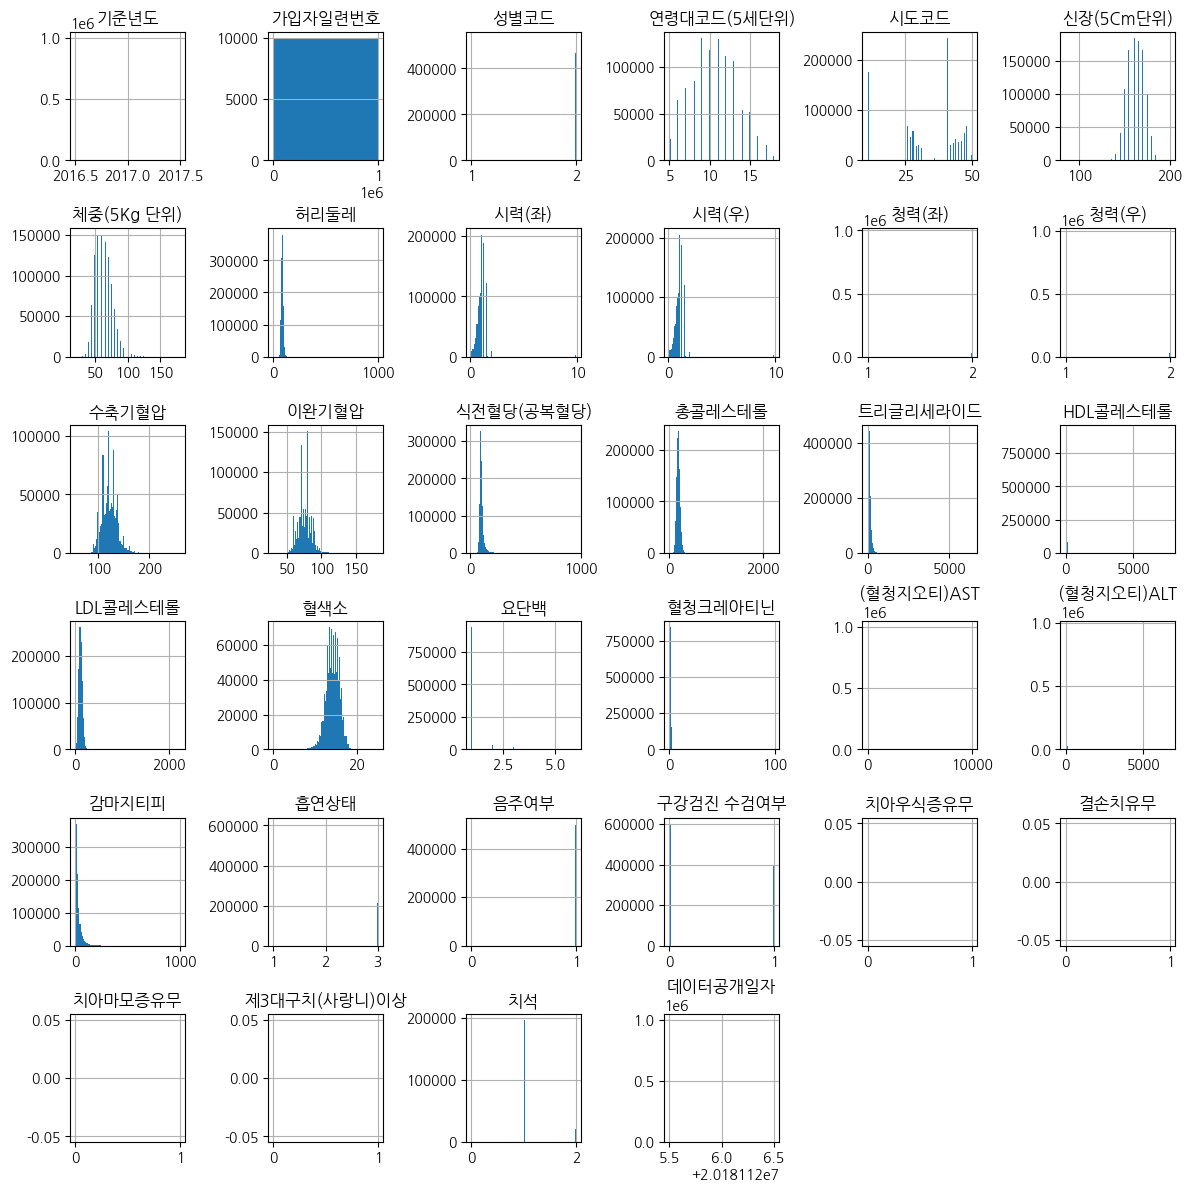

In [110]:
df.hist(figsize=(12, 12), bins=100)
plt.tight_layout(pad=1.0, w_pad=0.5, h_pad=0.5)
plt.show()

### Histogram after Slicing

* The data is divided and visualized using the slicing function.
* When using slicing, you can utilize `iloc` to slice based on the order of the index.
* By specifying the indices in the format `iloc[rows, columns]`, only the specified indices are retrieved. To fetch the entire dataset, you can use `[:, :]`.
* By placing numbers before and after the colon within the square brackets used for slicing, you can specify the range as `start_index:end_index(+1)`.

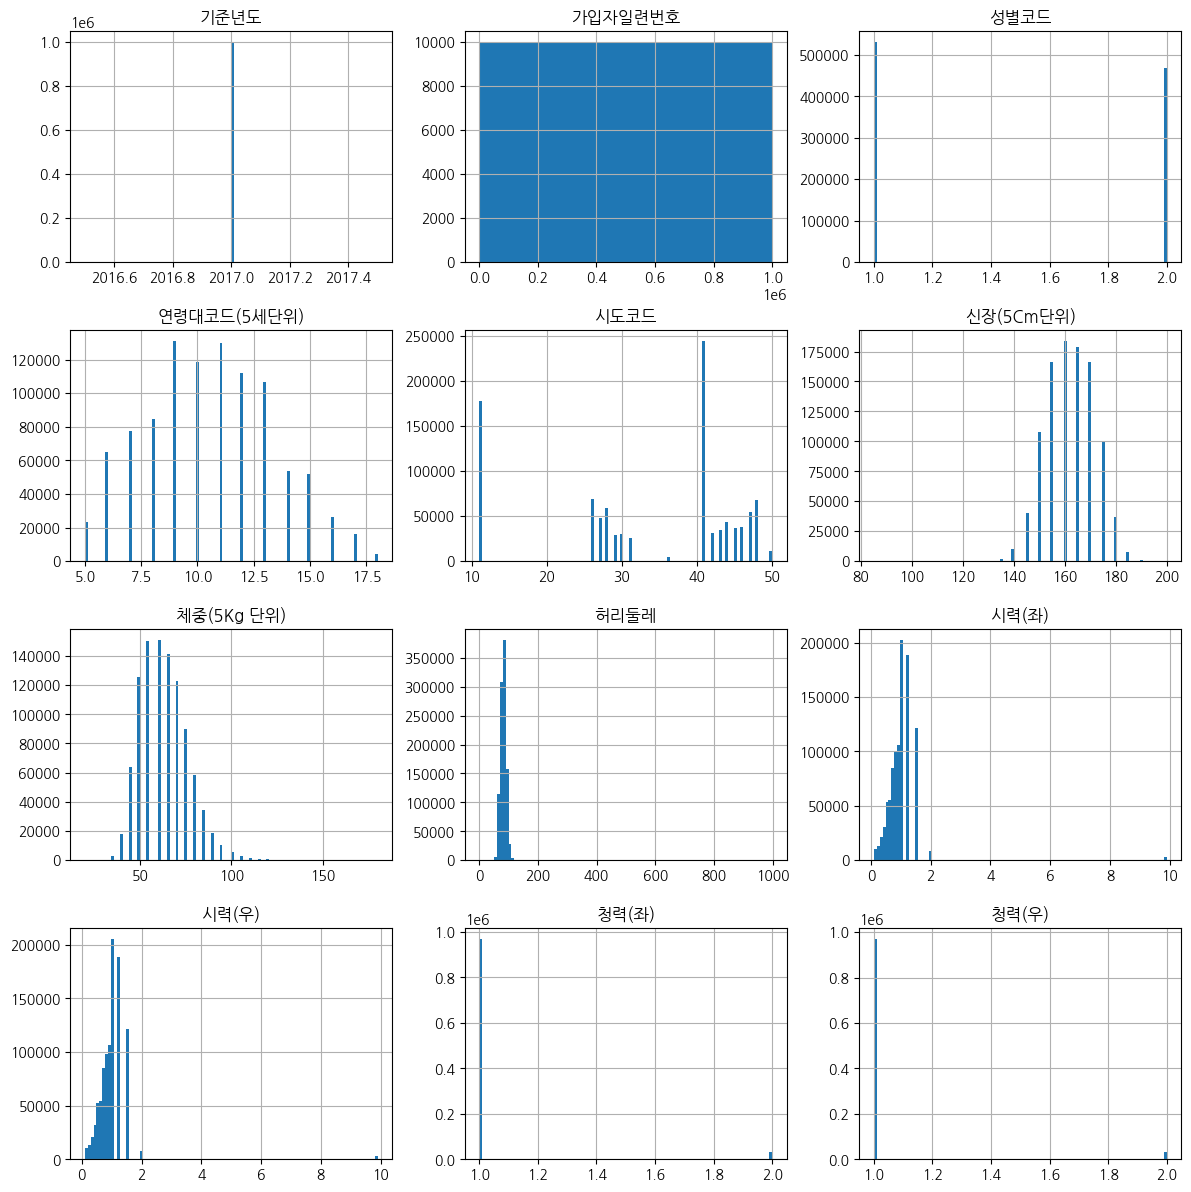

In [111]:
df.iloc[:, :12].hist(figsize=(12, 12), bins=100)
plt.tight_layout(pad=1.0, w_pad=0.5, h_pad=0.5)
plt.show()

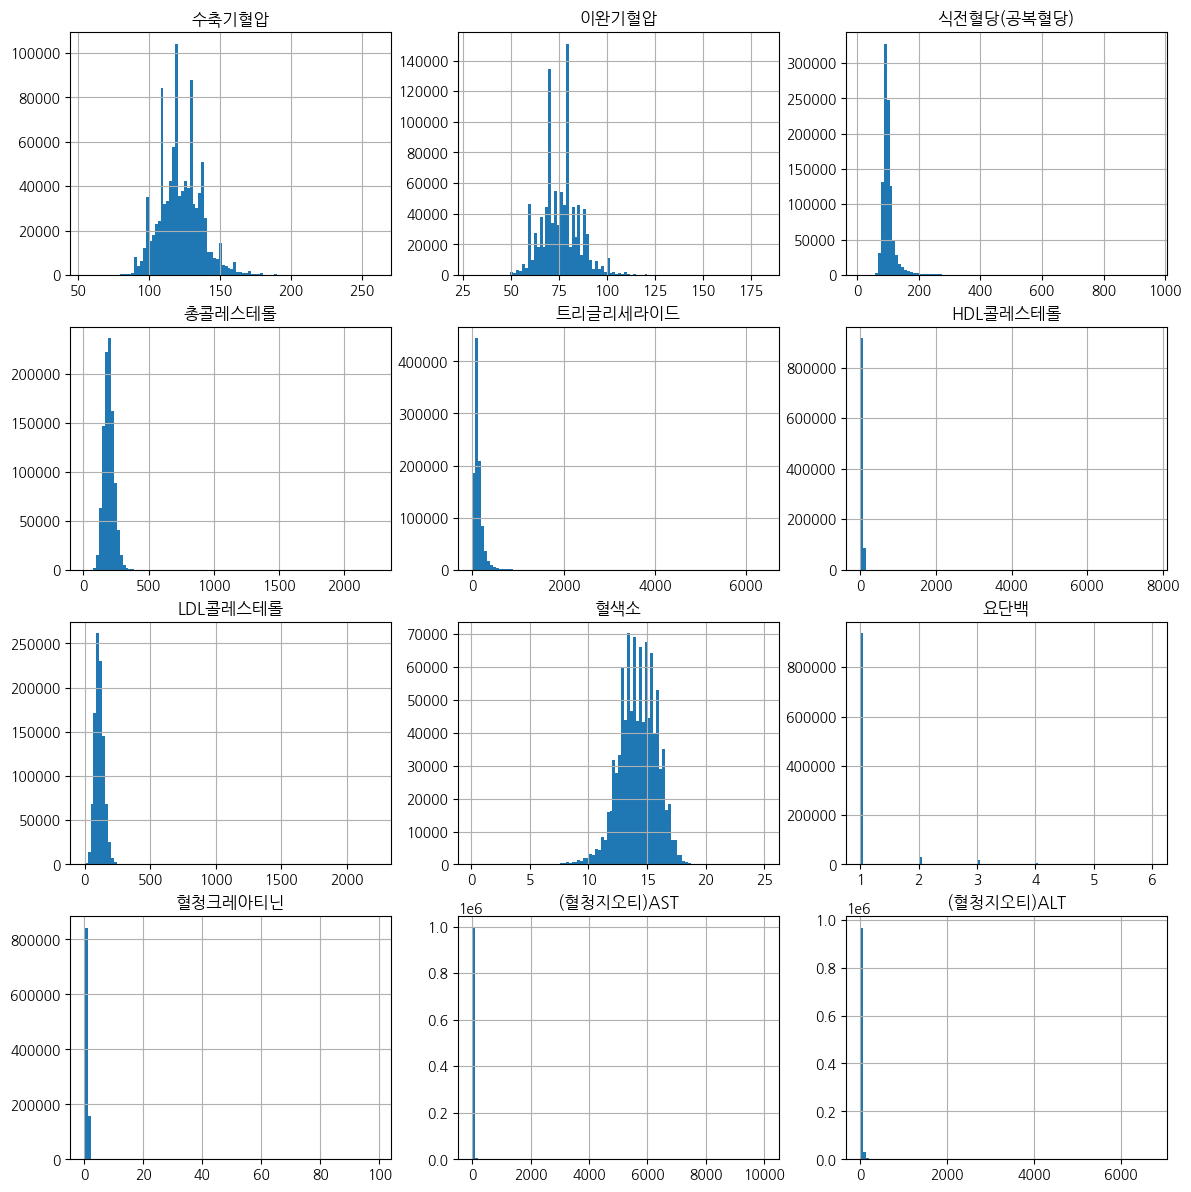

In [112]:
df.iloc[:,12:24].hist(figsize=(12, 12), bins=100)
plt.tight_layout(pad=1.0, w_pad=0.5, h_pad=0.5)
plt.show()

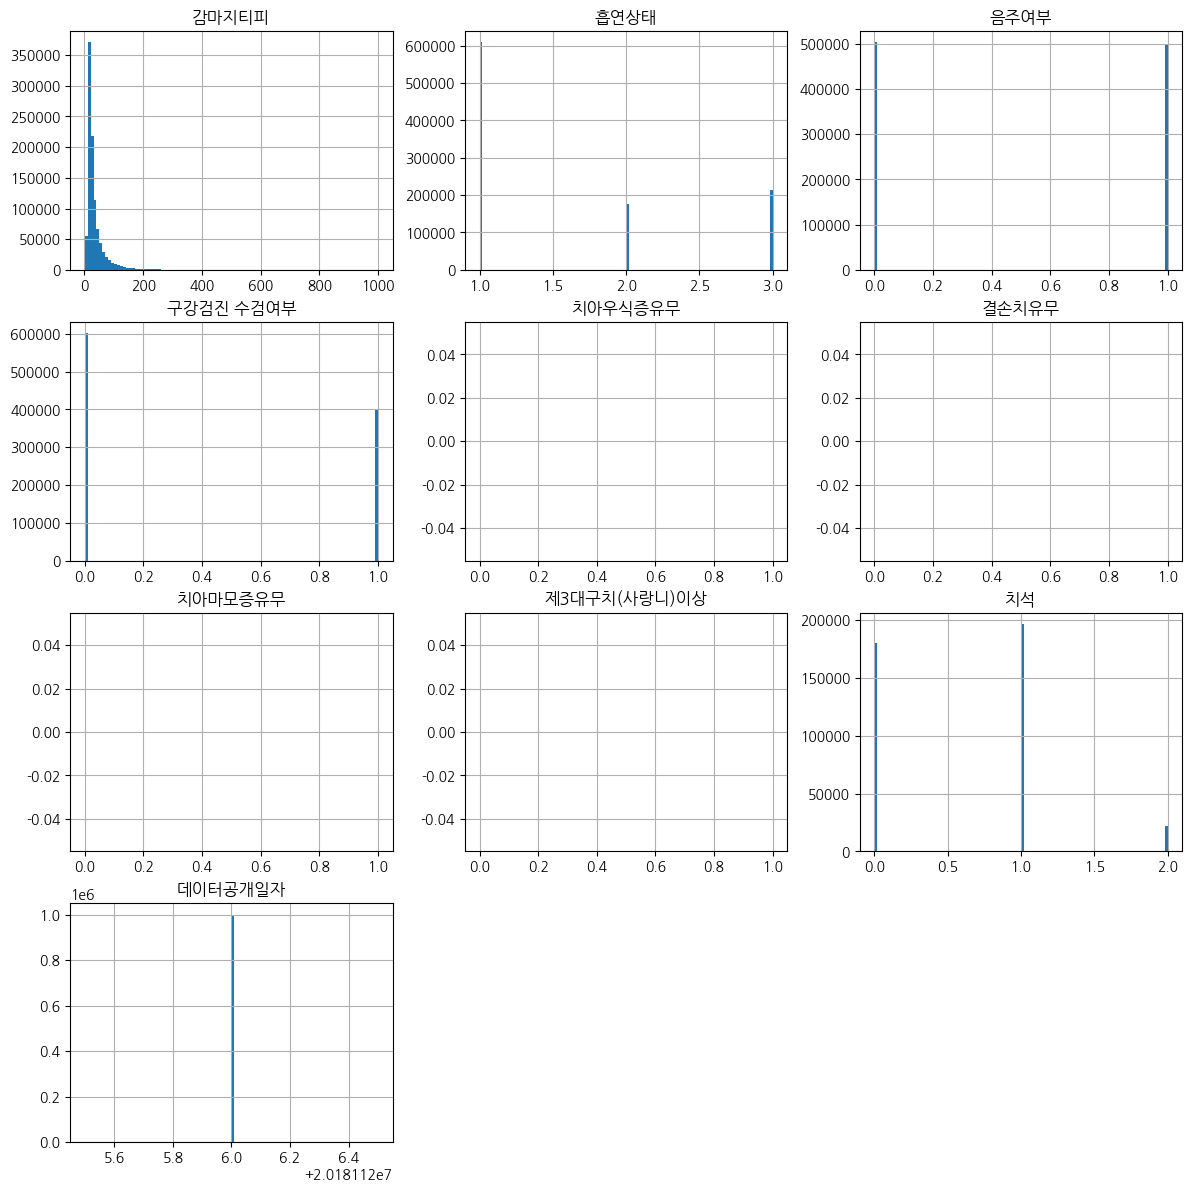

In [113]:
df.iloc[:,24:].hist(figsize=(12, 12), bins=100)
plt.tight_layout(pad=1.0, w_pad=0.5, h_pad=0.5)
plt.show()

### ✔ df.sample(n)

* Seaborn graphs involve internal mathematical computations, so processing large datasets can be time-consuming.

* Therefore, instead of using the entire dataset, a subset is sampled to improve speed and efficiency.

In [207]:
df_sample = df.sample(1000, random_state=1)

### 1) Categorical Data Visualization

* A countplot represents the summed values of categorical data in a graph.
* You can think of it as visualizing the values obtained from `value_counts`.

### ✔ df.countplot(x, data)  

: is used to visualize categorical data by displaying the count of observations in each categorical bin using bars.

### countplot - drinking

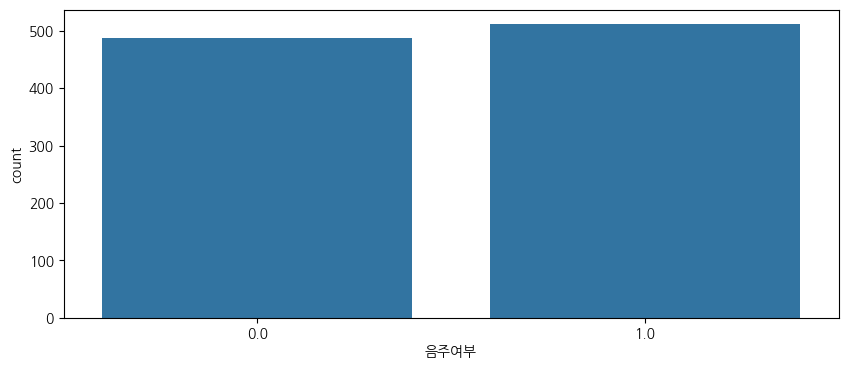

In [115]:
plt.figure(figsize=(10,4))
sns.countplot(x='음주여부', data=df_sample)
plt.show()

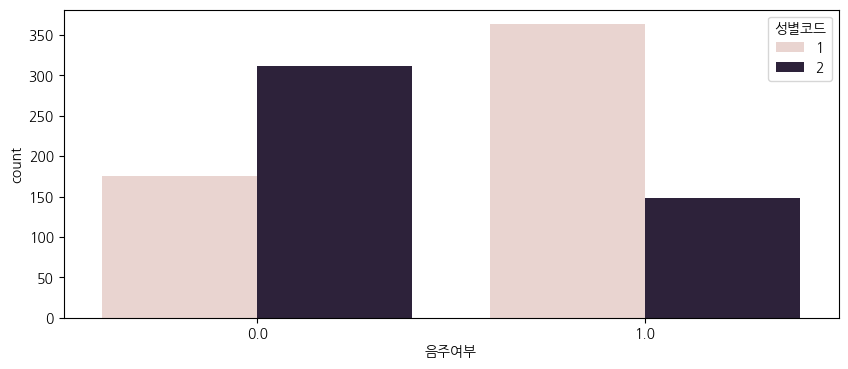

In [116]:
plt.figure(figsize=(10,4))
sns.countplot(x='음주여부', data=df_sample, hue='성별코드')
plt.show()

### countplot - height and weight

* Height and weight can be considered continuous data.
* However, in this dataset, height is grouped in 5 cm intervals and weight in 5 kg intervals.
* When data is grouped in this manner, it is more appropriate to treat it as categorical rather than continuous data.

In [117]:
df_sample.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상',
       '치석', '데이터공개일자'],
      dtype='object')

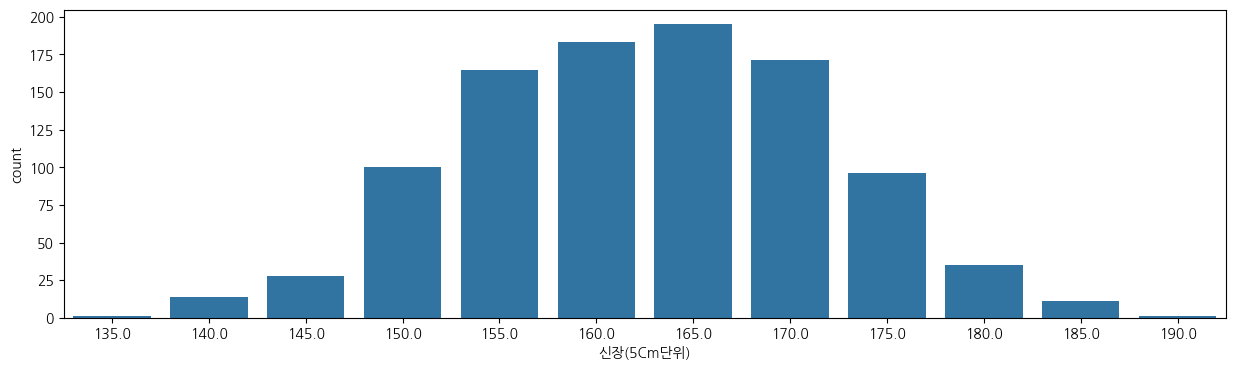

In [118]:
plt.figure(figsize=(15,4))
sns.countplot(x='신장(5Cm단위)', data=df_sample)
plt.show()

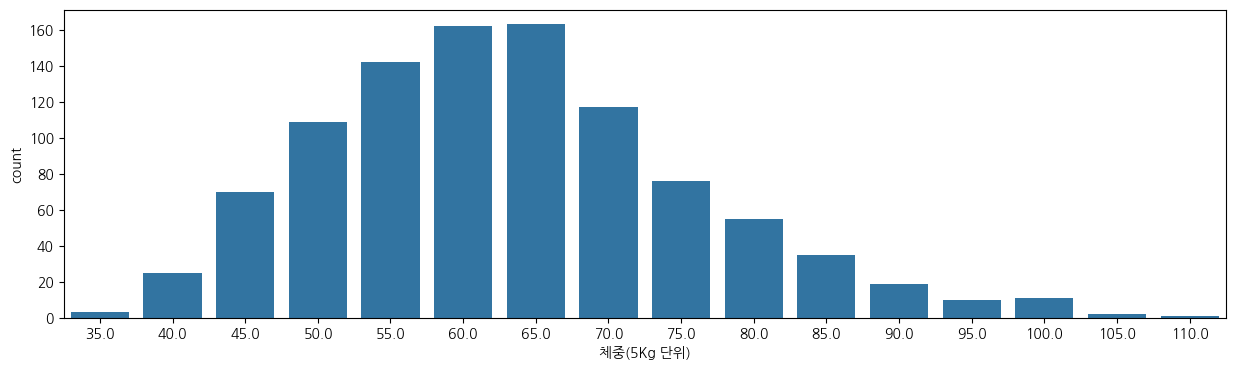

In [119]:
plt.figure(figsize=(15,4))
sns.countplot(x='체중(5Kg 단위)', data=df_sample)
plt.show()

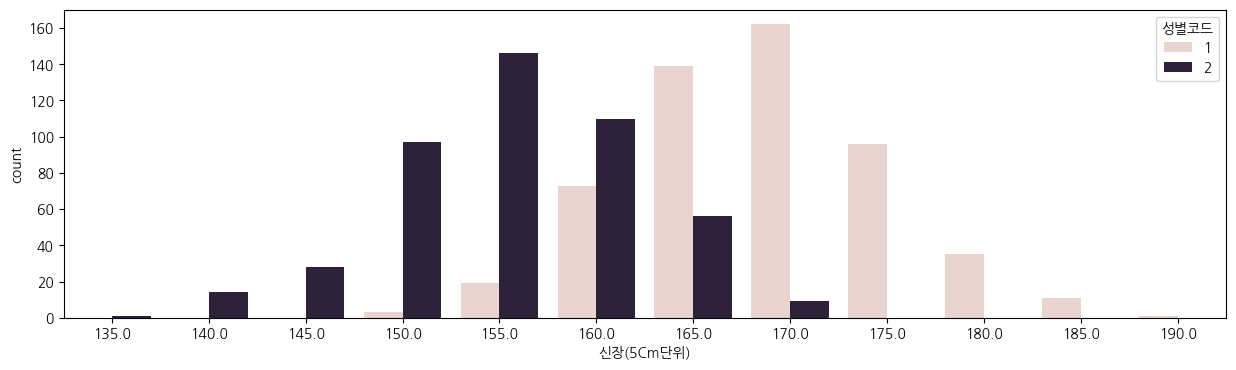

In [120]:
plt.figure(figsize=(15,4))
sns.countplot(x='신장(5Cm단위)', data=df_sample, hue = '성별코드')
plt.show()

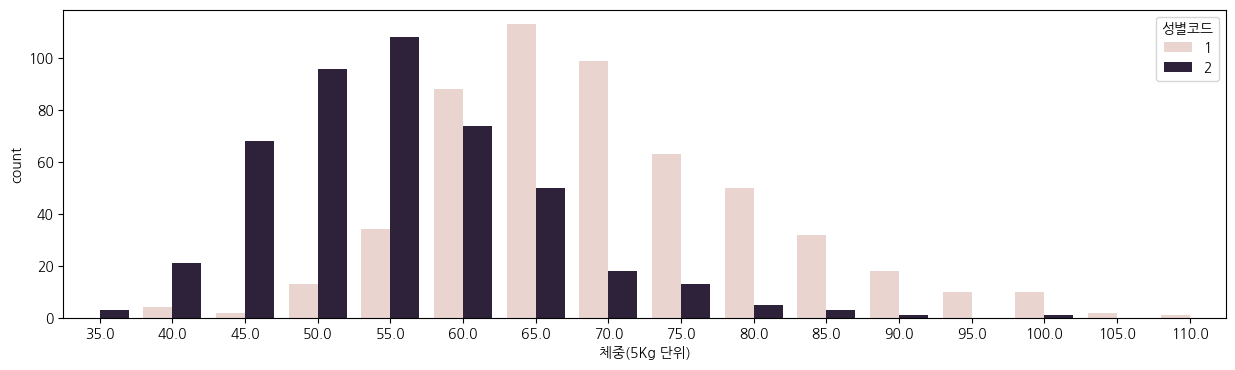

In [121]:
plt.figure(figsize=(15,4))
sns.countplot(x='체중(5Kg 단위)', data=df_sample, hue = '성별코드')
plt.show()

### barplot - Visualization of Numerical vs. Categorical Data


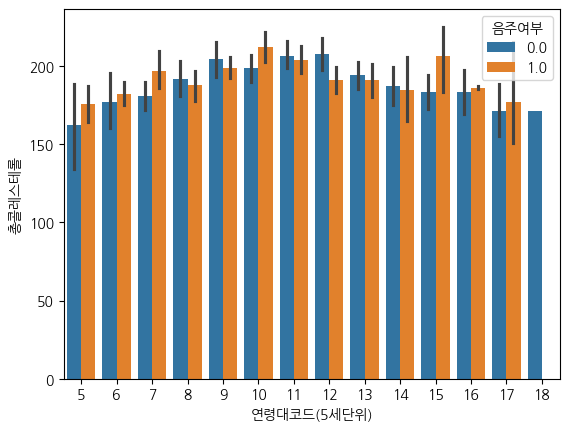

In [122]:
sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="총콜레스테롤", hue ='음주여부')
plt.show()

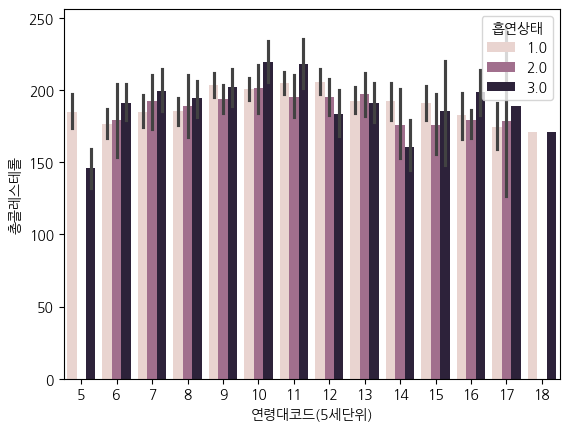

In [123]:
sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="총콜레스테롤", hue ='흡연상태')
plt.show()

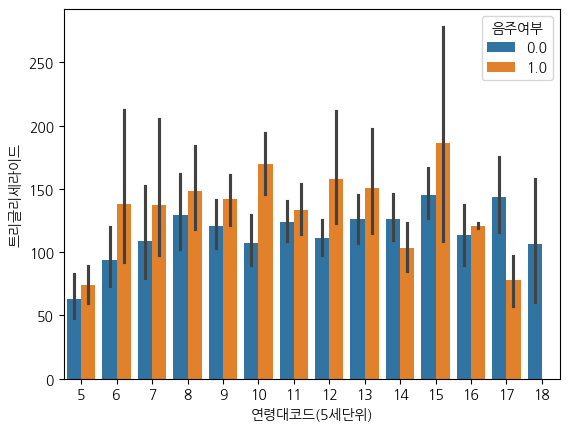

In [124]:
sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="트리글리세라이드", hue ='음주여부')
plt.show()

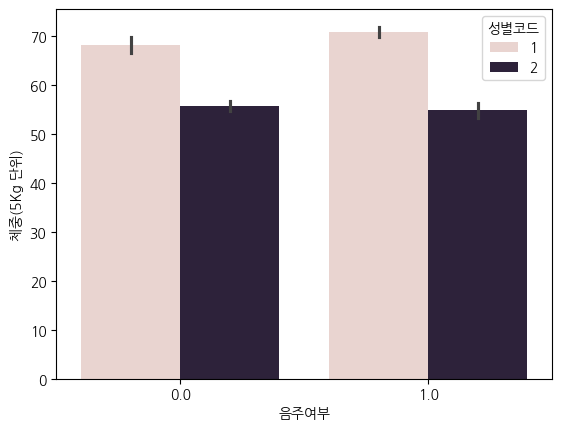

In [125]:
sns.barplot(data=df_sample, x="음주여부", y='체중(5Kg 단위)', hue ='성별코드')
plt.show()

### **lineplot and pointplot**

### ✔ lineplot

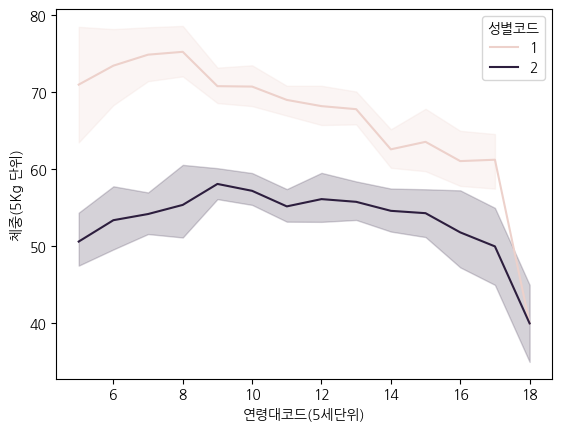

In [126]:
sns.lineplot(x = '연령대코드(5세단위)', y = '체중(5Kg 단위)', data = df_sample, hue = '성별코드')
plt.show()

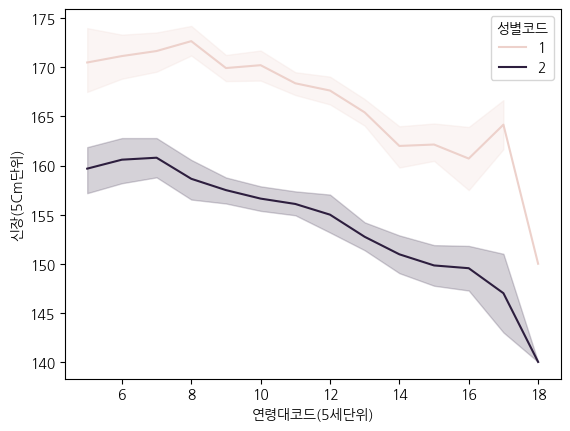

In [127]:
sns.lineplot(x = '연령대코드(5세단위)', y = '신장(5Cm단위)', data = df_sample, hue = '성별코드')
plt.show()

### ✔ pointplot

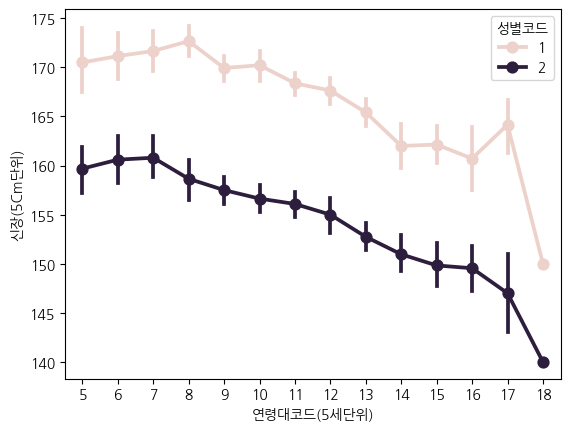

In [128]:
sns.pointplot(x = '연령대코드(5세단위)', y = '신장(5Cm단위)', data = df_sample, hue = '성별코드')
plt.show()

### **boxplot**


<Axes: xlabel='신장(5Cm단위)', ylabel='체중(5Kg 단위)'>

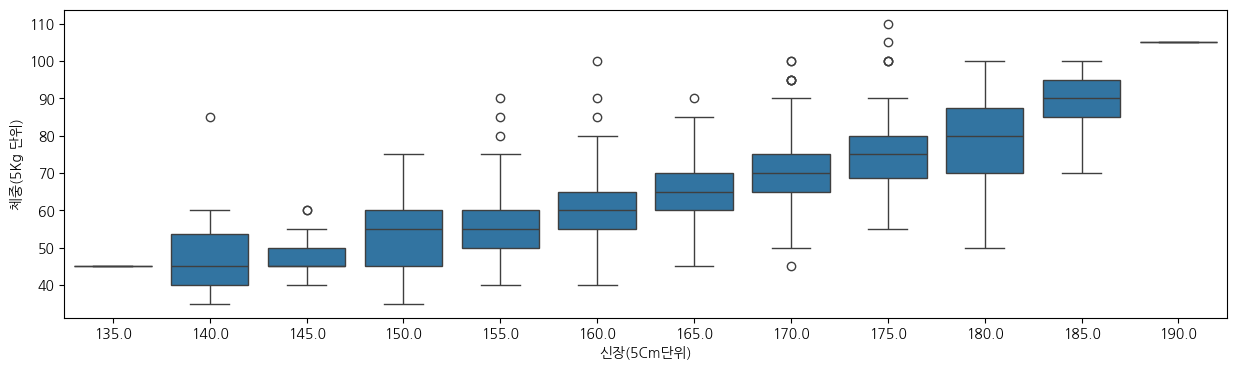

In [129]:
plt.figure(figsize=(15, 4))
sns.boxplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg 단위)")

<Axes: xlabel='신장(5Cm단위)', ylabel='체중(5Kg 단위)'>

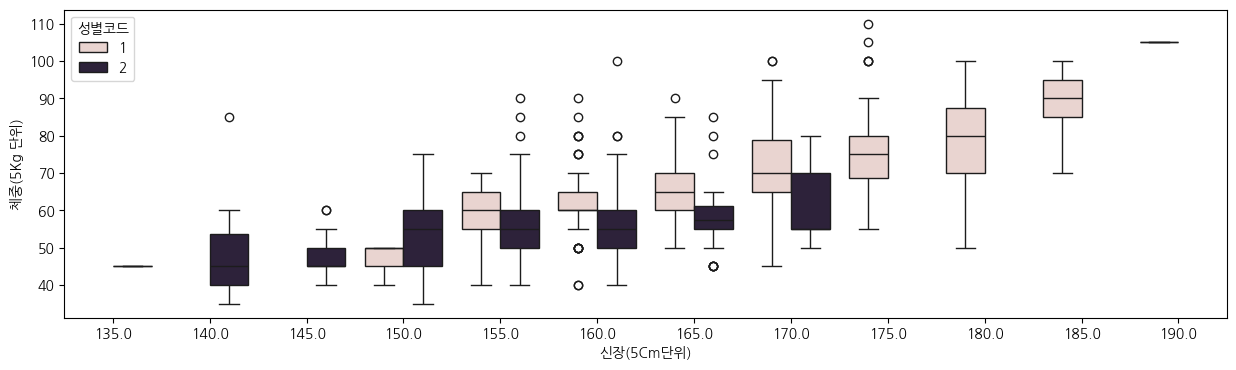

In [130]:
plt.figure(figsize=(15, 4))
sns.boxplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg 단위)", hue="성별코드")

<Axes: xlabel='신장(5Cm단위)', ylabel='체중(5Kg 단위)'>

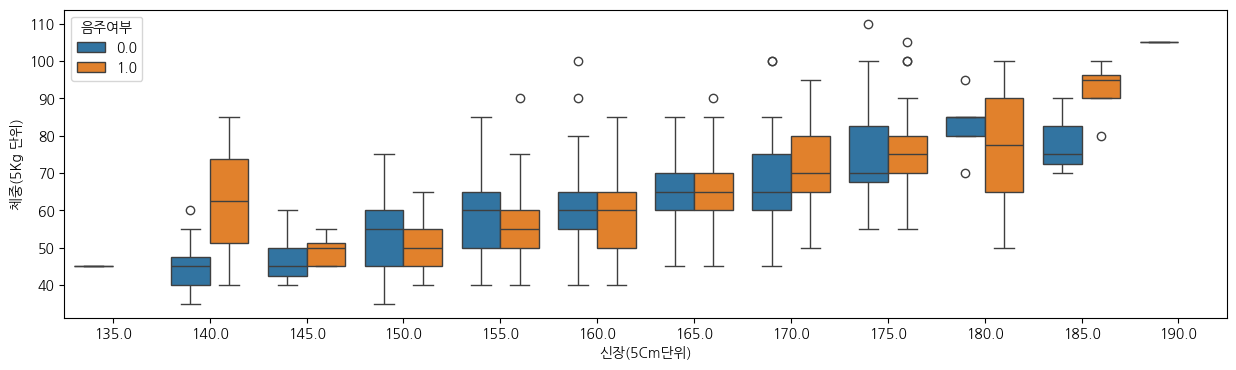

In [131]:
plt.figure(figsize=(15, 4))
sns.boxplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg 단위)", hue="음주여부")

### **violinplot**

: This visualizes the distribution of the data, its probability density, and its spread.

<Axes: xlabel='신장(5Cm단위)', ylabel='체중(5Kg 단위)'>

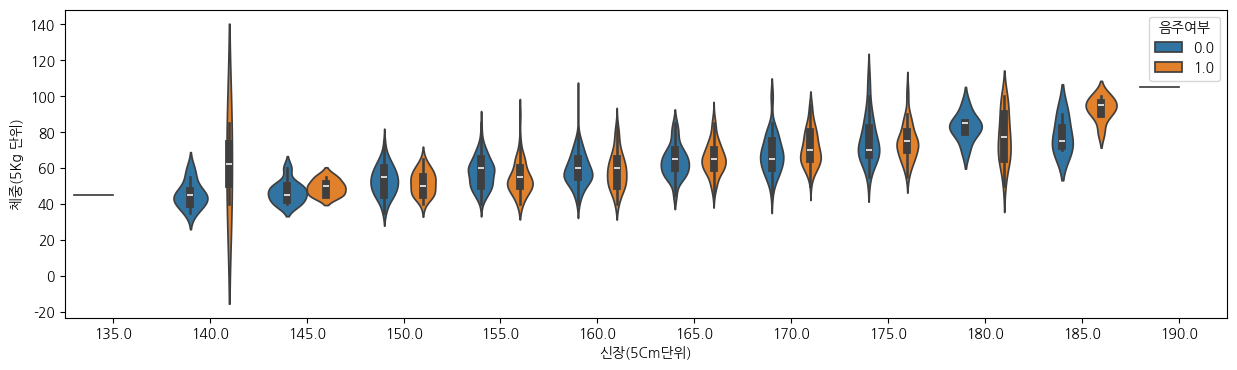

In [132]:
plt.figure(figsize=(15, 4))
sns.violinplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg 단위)", hue = '음주여부')

<Axes: xlabel='신장(5Cm단위)', ylabel='체중(5Kg 단위)'>

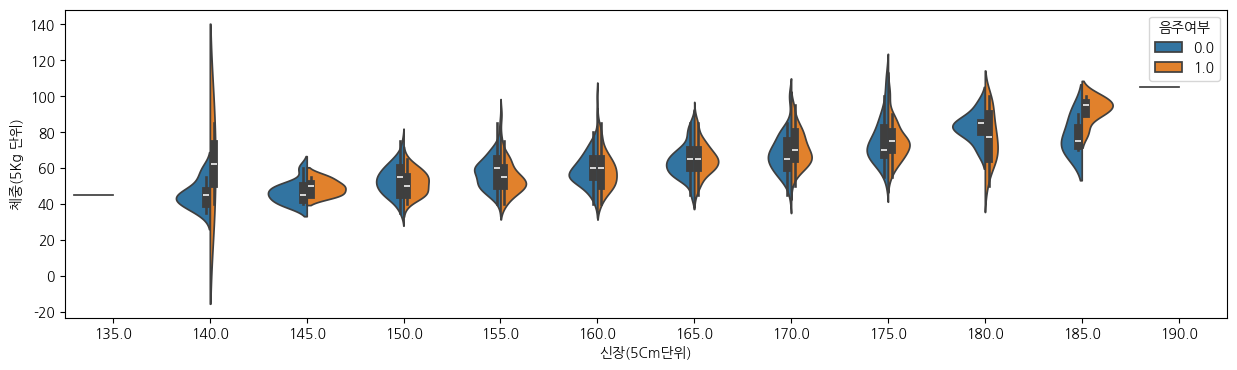

In [133]:
plt.figure(figsize=(15, 4))
sns.violinplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg 단위)", hue="음주여부", split=True)

<Axes: xlabel='연령대코드(5세단위)', ylabel='혈색소'>

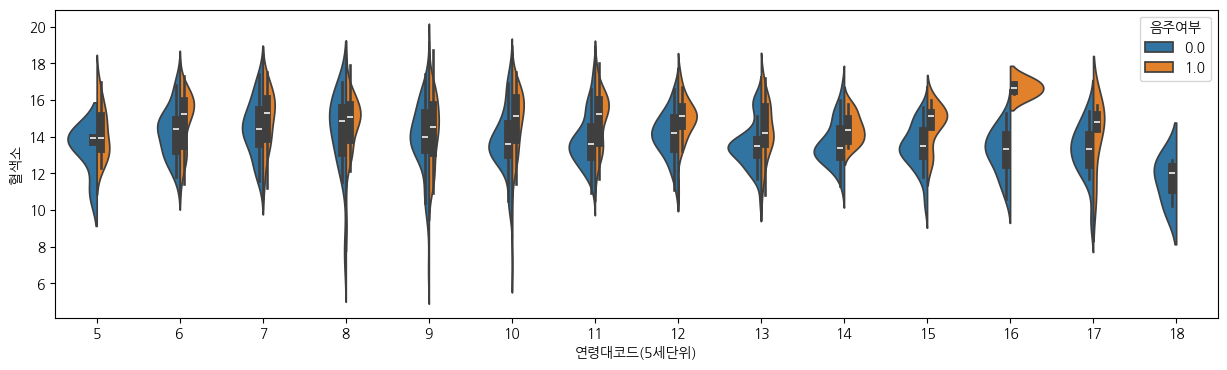

In [134]:
plt.figure(figsize=(15, 4))
sns.violinplot(data=df_sample, x="연령대코드(5세단위)", y="혈색소", hue="음주여부", split=True)

### **swarm plot**

: is used to visualize categorical data in a scatterplot format.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 37.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 52.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 51.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 55.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 48.0% of the points cannot be plac

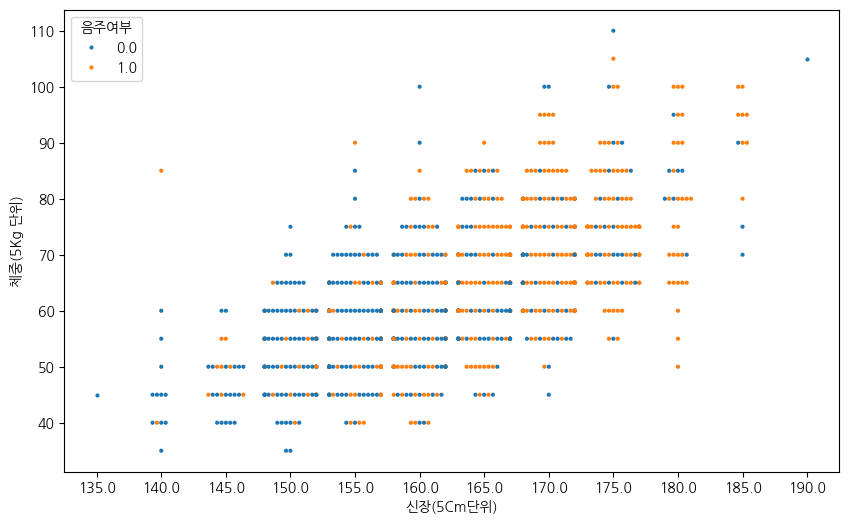

In [210]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x='신장(5Cm단위)', y='체중(5Kg 단위)', hue='음주여부', data=df_sample, size=3)
plt.show()

<Figure size 1000x600 with 0 Axes>

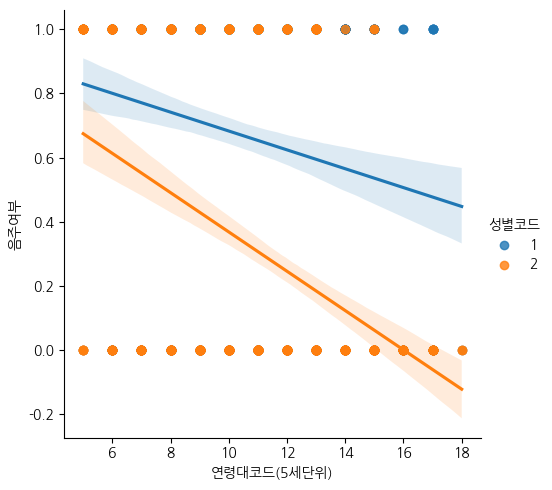

In [137]:
plt.figure(figsize=(10, 6))
sns.lmplot(x='연령대코드(5세단위)', y='음주여부', hue='성별코드', data=df_sample)
plt.show()

### 2) Numerical Data Visualization

### scatterplot

* Scatterplots are primarily used to examine the relationship between numerical variables.
* The size of the points can be adjusted based on the numerical values of the data.

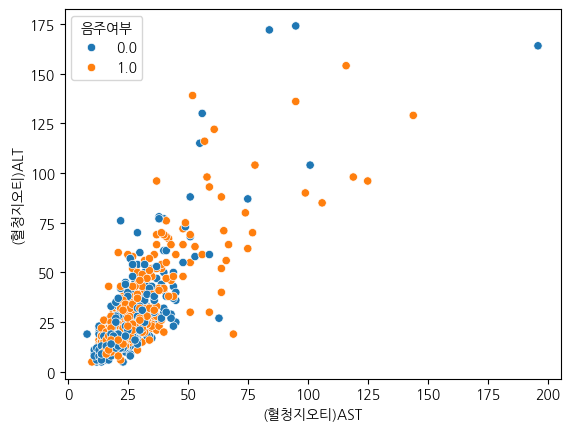

In [138]:
sns.scatterplot(x='(혈청지오티)AST', y='(혈청지오티)ALT', hue='음주여부', data=df_sample)
plt.show()

### lmplot - Viewing Correlations

* `lmplot` is used to visualize the correlation between two numerical variables.
* It draws a linear regression line, making it easier to understand the relationship between the data.

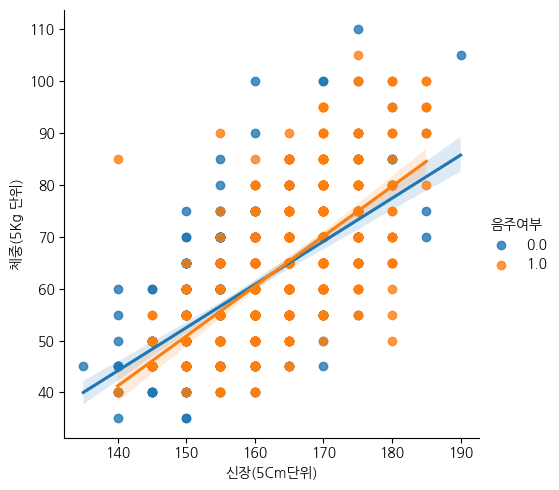

In [139]:
sns.lmplot(x='신장(5Cm단위)', y='체중(5Kg 단위)', hue='음주여부', data=df_sample)
plt.show()

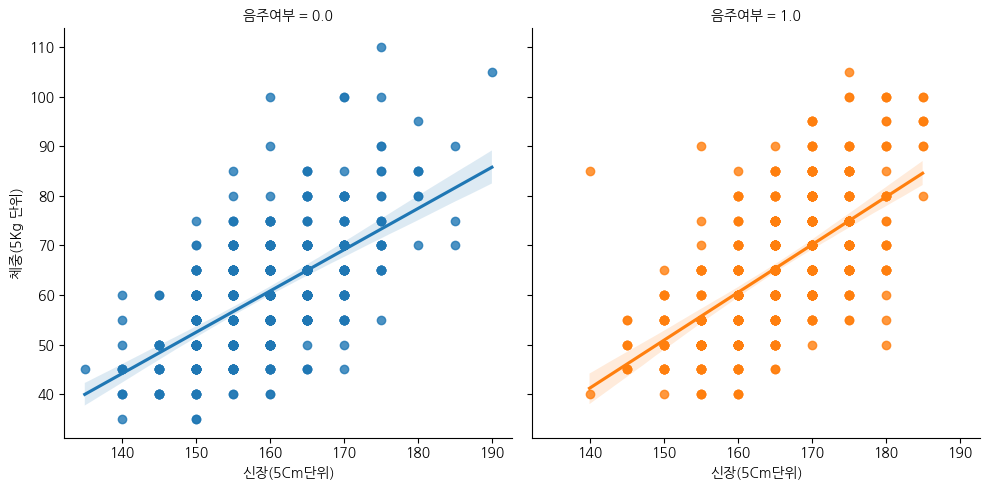

In [140]:
sns.lmplot(x='신장(5Cm단위)', y='체중(5Kg 단위)', hue='음주여부', data=df_sample, col='음주여부')
plt.show()

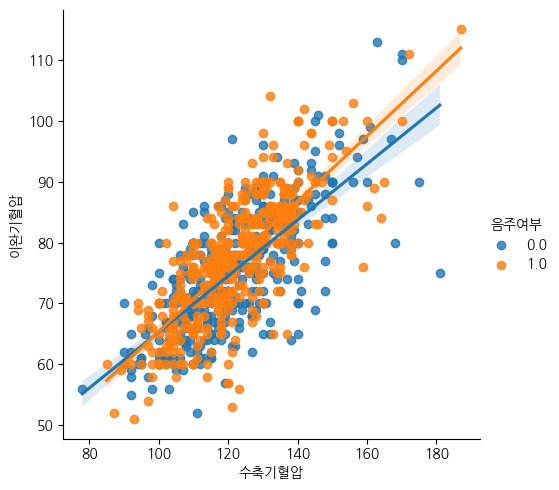

In [141]:
sns.lmplot(x='수축기혈압', y='이완기혈압', hue='음주여부', data=df_sample)
plt.show()


AST and ALT are enzymes found within liver cells.

When the liver is damaged and liver cells are destroyed, AST and ALT leak into the bloodstream and circulate throughout the body. Therefore, if the liver is damaged, the levels of AST and ALT increase.

Normal levels vary slightly depending on the hospital, but typically, AST ranges from 5 to 35 IU/L, and ALT ranges from 5 to 40 IU/L.

Sometimes, drinking alcohol the day before or being physically fatigued can temporarily elevate AST and ALT levels above the normal range. For this reason, liver disease is rarely diagnosed based on a single test alone. However, liver enzyme levels like AST and ALT are very important indicators for initially assessing the condition of the liver.


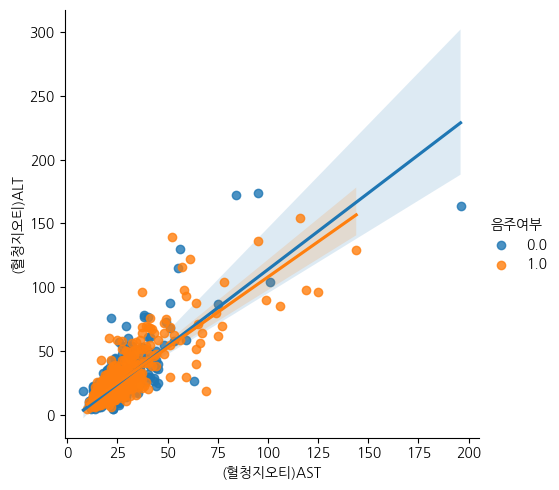

In [142]:
sns.lmplot(x='(혈청지오티)AST', y='(혈청지오티)ALT', hue='음주여부', data=df_sample)
plt.show()


### Handling Outliers

* Outliers can obscure the details of the data or alter the regression line.
* After identifying outliers through visualization, you can choose to remove them for a clearer view or isolate them for further analysis.

In [143]:
df_ASLT = df[(df['(혈청지오티)AST'] <= 400) & (df['(혈청지오티)ALT'] <= 400)]
df_ASLT

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,13,46,170.0,65.0,91.0,1.0,1.2,...,25.0,3.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
1,2017,2,2,8,41,150.0,45.0,73.4,1.2,1.0,...,10.0,1.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
2,2017,3,1,8,45,175.0,75.0,94.0,1.0,0.8,...,136.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
3,2017,4,2,12,11,155.0,55.0,67.5,0.9,1.0,...,30.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
4,2017,5,1,8,41,175.0,75.0,93.0,1.5,1.5,...,68.0,3.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2017,999996,2,9,41,165.0,55.0,70.0,1.5,1.5,...,11.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
999996,2017,999997,2,9,11,165.0,50.0,68.0,1.2,1.5,...,11.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
999997,2017,999998,2,12,27,155.0,50.0,83.8,0.2,1.0,...,12.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
999998,2017,999999,1,11,47,160.0,70.0,99.0,0.8,0.9,...,35.0,2.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126


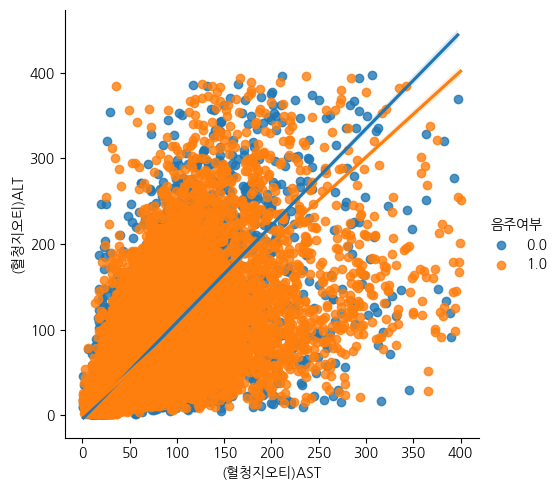

In [144]:
sns.lmplot(x='(혈청지오티)AST', y='(혈청지오티)ALT', hue='음주여부', data=df_ASLT)
plt.show()

In [145]:
df_ASLT_high = df[(df['(혈청지오티)AST'] > 400) & (df['(혈청지오티)ALT'] > 400)]
df_ASLT_high


,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
2771,2017,2772,1,8,44,170.0,65.0,82.2,1.0,0.9,...,280.0,3.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
5047,2017,5048,1,7,31,170.0,60.0,77.0,1.5,1.5,...,33.0,1.0,1.0,1,NaN,NaN,NaN,NaN,0.0,20181126
16433,2017,16434,2,12,44,160.0,65.0,86.0,1.0,1.0,...,672.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
22868,2017,22869,1,11,48,165.0,60.0,84.0,0.9,0.8,...,464.0,2.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
28956,2017,28957,1,14,11,160.0,70.0,95.0,0.1,0.2,...,297.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958204,2017,958205,2,5,41,155.0,50.0,60.0,0.9,0.8,...,132.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
968788,2017,968789,1,11,48,165.0,65.0,76.0,0.8,0.6,...,326.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
984083,2017,984084,2,10,42,155.0,55.0,68.0,0.9,1.2,...,212.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
990160,2017,990161,1,13,11,170.0,70.0,85.0,0.8,0.8,...,626.0,2.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126


### **distplot**

: is used to visualize the distribution of data by displaying both a histogram and a kernel density estimate (KDE) curve, helping to understand the distribution and density of continuous data.

In [146]:
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상',
       '치석', '데이터공개일자'],
      dtype='object')

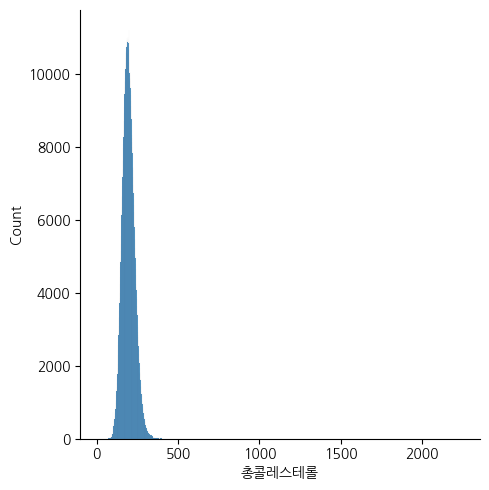

In [147]:
sns.displot(df['총콜레스테롤'])

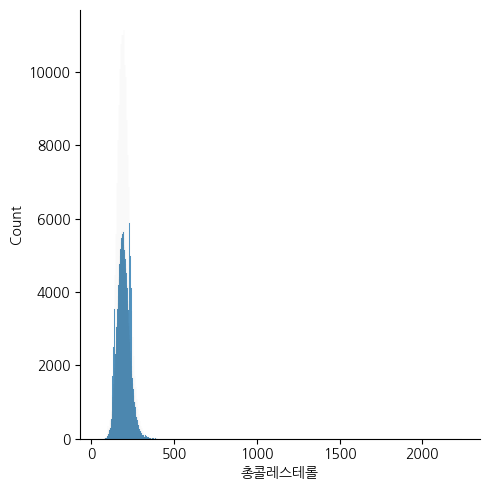

In [148]:
df_drink = df[df['음주여부'] == 1]
sns.displot(df_drink['총콜레스테롤'])

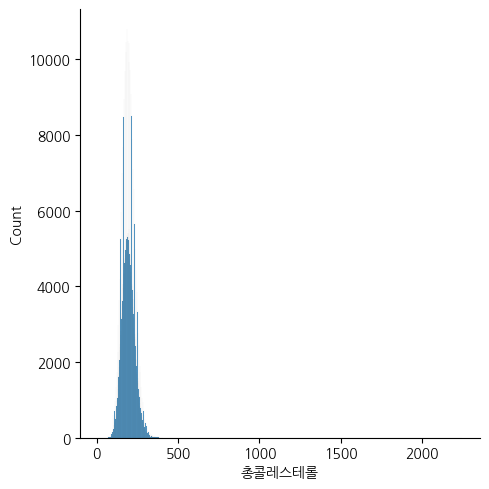

In [149]:
df_no_drink = df[df['음주여부'] == 0]
sns.displot(df_no_drink['총콜레스테롤'])

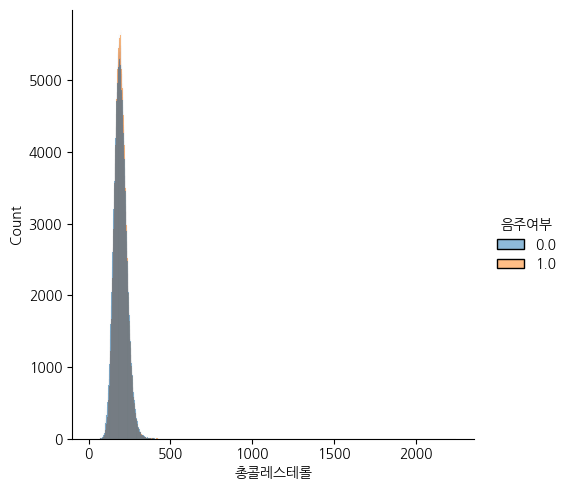

In [150]:
sns.displot(df, x='총콜레스테롤', hue='음주여부')

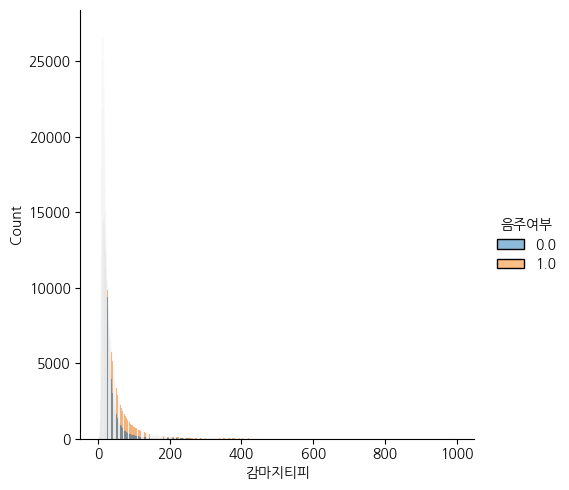

In [151]:
sns.displot(df, x='감마지티피', hue='음주여부')

##1-5. Correlation Analysis

```
If r is between -1.0 and -0.7, there is a strong negative linear relationship.
If r is between -0.7 and -0.3, there is a distinct negative linear relationship.
If r is between -0.3 and -0.1, there is a weak negative linear relationship.
If r is between -0.1 and +0.1, the linear relationship can be almost negligible.
If r is between +0.1 and +0.3, there is a weak positive linear relationship.
If r is between +0.3 and +0.7, there is a distinct positive linear relationship.
If r is between +0.7 and +1.0, there is a strong positive linear relationship.

```

In [152]:
columns = ['연령대코드(5세단위)', '체중(5Kg 단위)', '신장(5Cm단위)', '허리둘레',
           '시력(좌)', '시력(우)', '청력(좌)', '청력(우)',
           '수축기혈압', '이완기혈압', '식전혈당(공복혈당)',
           '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백',
           '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태', '음주여부']
columns

['연령대코드(5세단위)',
 '체중(5Kg 단위)',
 '신장(5Cm단위)',
 '허리둘레',
 '시력(좌)',
 '시력(우)',
 '청력(좌)',
 '청력(우)',
 '수축기혈압',
 '이완기혈압',
 '식전혈당(공복혈당)',
 '총콜레스테롤',
 '트리글리세라이드',
 'HDL콜레스테롤',
 'LDL콜레스테롤',
 '혈색소',
 '요단백',
 '혈청크레아티닌',
 '(혈청지오티)AST',
 '(혈청지오티)ALT',
 '감마지티피',
 '흡연상태',
 '음주여부']

### **Pearson correlation coefficient**

### ✔ df.corr()

In [153]:
df_small = df[columns]
df_small.corr()


,연령대코드(5세단위),체중(5Kg 단위),신장(5Cm단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,...,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부
연령대코드(5세단위),1.000000,-0.199876,-0.395786,0.117940,-0.172696,-0.170176,0.206999,0.201472,0.263928,0.105549,...,-0.096192,0.024144,-0.175793,0.040982,0.022181,0.055063,-0.025933,0.015458,-0.125714,-0.283296
체중(5Kg 단위),-0.199876,1.000000,0.657670,0.640539,0.086712,0.088275,-0.046602,-0.046584,0.254458,0.281782,...,-0.267159,0.066803,0.490242,0.029869,0.122200,0.097819,0.287999,0.218271,0.355834,0.259927
신장(5Cm단위),-0.395786,0.657670,1.000000,0.258480,0.137342,0.139816,-0.084862,-0.084677,0.036313,0.110772,...,-0.137530,-0.014309,0.525946,0.000604,0.139798,0.036744,0.148407,0.159823,0.461294,0.372945
허리둘레,0.117940,0.640539,0.258480,1.000000,0.003689,0.005267,0.032602,0.030871,0.271407,0.240521,...,-0.232743,0.060141,0.284056,0.041646,0.079188,0.093887,0.219730,0.182693,0.198666,0.090751
시력(좌),-0.172696,0.086712,0.137342,0.003689,1.000000,0.316552,-0.043125,-0.043011,-0.037540,-0.001480,...,-0.005257,0.003655,0.085837,-0.012702,0.015256,-0.005974,0.018486,0.015217,0.063422,0.076444
시력(우),-0.170176,0.088275,0.139816,0.005267,0.316552,1.000000,-0.042862,-0.040846,-0.034880,0.001286,...,-0.005940,0.002282,0.088270,-0.013815,0.016231,-0.004838,0.019943,0.016171,0.065295,0.076728
청력(좌),0.206999,-0.046602,-0.084862,0.032602,-0.043125,-0.042862,1.000000,0.541857,0.058141,0.007645,...,-0.026965,-0.017299,-0.038076,0.020217,0.011113,0.012624,-0.009176,0.001421,-0.023609,-0.059665
청력(우),0.201472,-0.046584,-0.084677,0.030871,-0.043011,-0.040846,0.541857,1.000000,0.057992,0.007774,...,-0.026510,-0.016461,-0.038537,0.019970,0.010450,0.012903,-0.008959,0.001607,-0.023908,-0.058703
수축기혈압,0.263928,0.254458,0.036313,0.271407,-0.037540,-0.034880,0.058141,0.057992,1.000000,0.740197,...,-0.103768,0.034300,0.165633,0.060947,0.055868,0.078919,0.119977,0.160262,0.084142,0.032232
이완기혈압,0.105549,0.281782,0.110772,0.240521,-0.001480,0.001286,0.007645,0.007774,0.740197,1.000000,...,-0.086789,0.067207,0.242907,0.042040,0.047858,0.076905,0.135740,0.175119,0.125787,0.101132


In [154]:
# Calculate the correlations
correlations = df_small.corr()

# Filter for correlations with '신장(5Cm단위)' greater than or equal to 0.5
high_corr_height = correlations[correlations['신장(5Cm단위)'] >= 0.5]

# Display the filtered correlations
print(high_corr_height)

            연령대코드(5세단위)  체중(5Kg 단위)  신장(5Cm단위)      허리둘레     시력(좌)     시력(우)  \
체중(5Kg 단위)    -0.199876    1.000000   0.657670  0.640539  0.086712  0.088275   
신장(5Cm단위)     -0.395786    0.657670   1.000000  0.258480  0.137342  0.139816   
혈색소           -0.175793    0.490242   0.525946  0.284056  0.085837  0.088270   

               청력(좌)     청력(우)     수축기혈압     이완기혈압  ...  HDL콜레스테롤  LDL콜레스테롤  \
체중(5Kg 단위) -0.046602 -0.046584  0.254458  0.281782  ... -0.267159  0.066803   
신장(5Cm단위)  -0.084862 -0.084677  0.036313  0.110772  ... -0.137530 -0.014309   
혈색소        -0.038076 -0.038537  0.165633  0.242907  ... -0.168297  0.102434   

                 혈색소       요단백   혈청크레아티닌  (혈청지오티)AST  (혈청지오티)ALT     감마지티피  \
체중(5Kg 단위)  0.490242  0.029869  0.122200    0.097819    0.287999  0.218271   
신장(5Cm단위)   0.525946  0.000604  0.139798    0.036744    0.148407  0.159823   
혈색소         1.000000  0.000235  0.106659    0.095904    0.236262  0.223950   

                흡연상태      음주여부  
체중(5Kg 단위)  0.35

In [155]:
high_corr_drinking = correlations[correlations['음주여부'] >= 0.5]
print(high_corr_drinking)

      연령대코드(5세단위)  체중(5Kg 단위)  신장(5Cm단위)      허리둘레     시력(좌)     시력(우)  \
음주여부    -0.283296    0.259927   0.372945  0.090751  0.076444  0.076728   

         청력(좌)     청력(우)     수축기혈압     이완기혈압  ...  HDL콜레스테롤  LDL콜레스테롤  \
음주여부 -0.059665 -0.058703  0.032232  0.101132  ...  0.039145 -0.042146   

           혈색소       요단백   혈청크레아티닌  (혈청지오티)AST  (혈청지오티)ALT     감마지티피  \
음주여부  0.301064 -0.003636  0.047724    0.040402    0.068306  0.206329   

          흡연상태  음주여부  
음주여부  0.352014   1.0  

[1 rows x 23 columns]


In [156]:
high_corr_blood = correlations[correlations['혈색소'] >= 0.5]
print(high_corr_blood)

           연령대코드(5세단위)  체중(5Kg 단위)  신장(5Cm단위)      허리둘레     시력(좌)     시력(우)  \
신장(5Cm단위)    -0.395786    0.657670   1.000000  0.258480  0.137342  0.139816   
혈색소          -0.175793    0.490242   0.525946  0.284056  0.085837  0.088270   

              청력(좌)     청력(우)     수축기혈압     이완기혈압  ...  HDL콜레스테롤  LDL콜레스테롤  \
신장(5Cm단위) -0.084862 -0.084677  0.036313  0.110772  ... -0.137530 -0.014309   
혈색소       -0.038076 -0.038537  0.165633  0.242907  ... -0.168297  0.102434   

                혈색소       요단백   혈청크레아티닌  (혈청지오티)AST  (혈청지오티)ALT     감마지티피  \
신장(5Cm단위)  0.525946  0.000604  0.139798    0.036744    0.148407  0.159823   
혈색소        1.000000  0.000235  0.106659    0.095904    0.236262  0.223950   

               흡연상태      음주여부  
신장(5Cm단위)  0.461294  0.372945  
혈색소        0.450956  0.301064  

[2 rows x 23 columns]


In [157]:
high_corr_gamma = correlations[correlations['감마지티피'] >= 0.5]
print(high_corr_gamma)

       연령대코드(5세단위)  체중(5Kg 단위)  신장(5Cm단위)      허리둘레     시력(좌)     시력(우)  \
감마지티피     0.015458    0.218271   0.159823  0.182693  0.015217  0.016171   

          청력(좌)     청력(우)     수축기혈압     이완기혈압  ...  HDL콜레스테롤  LDL콜레스테롤  \
감마지티피  0.001421  0.001607  0.160262  0.175119  ... -0.049655 -0.007723   

           혈색소       요단백   혈청크레아티닌  (혈청지오티)AST  (혈청지오티)ALT  감마지티피      흡연상태  \
감마지티피  0.22395  0.052788  0.043668    0.329224    0.394404    1.0  0.242169   

           음주여부  
감마지티피  0.206329  

[1 rows x 23 columns]


## **heatmap**


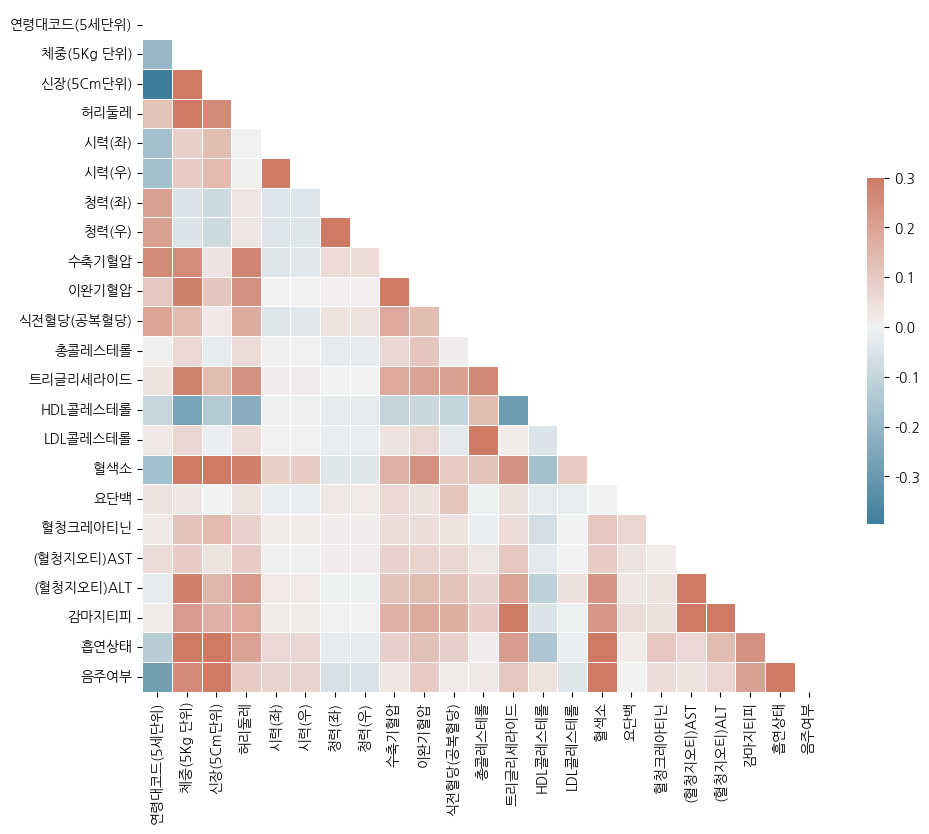

In [158]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlations, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlations, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

# **📌** Q1.

  Calculate the descriptive statistics for waist by age group. Use the provided dictionary to convert the age group codes (in 5-year increments) into "Age Group" and calculate the descriptive statistics as shown below.








🔽 Dictionary

age_code = {1: '0~4세',

 2: '5~9세',

 3: '10~14세',

 4: '15~19세',

 5: '20~24세',

 6: '25~29세',

 7: '30~34세',

 8: '35~39세',

 9: '40~44세',

 10: '45~49세',

 11: '50~54세',

 12: '55~59세',

 13: '60~64세',

 14: '65~69세',

 15: '70~74세',

 16: '75~79세',

 17: '80~84세',

 18: '85세+'}



🔽 Example Output

The result should match the image below, and it's okay if the format of decimal points differs. For instance, if the example result is 32 but your calculated value shows as 32.0, that's perfectly acceptable.

In [159]:
image_url = "https://cphinf.pstatic.net/mooc/20221101_277/1667298617381WqSJX_PNG/mceclip0.png"
display(Image(url=image_url))

## Approach 1 - .map

In [160]:
# Create a new DataFrame by copying the original data
df_q1 = df.copy()

In [161]:
# Set a dictionary
age_code = {
    1: '0~4세',
    2: '5~9세',
    3: '10~14세',
    4: '15~19세',
    5: '20~24세',
    6: '25~29세',
    7: '30~34세',
    8: '35~39세',
    9: '40~44세',
    10: '45~49세',
    11: '50~54세',
    12: '55~59세',
    13: '60~64세',
    14: '65~69세',
    15: '70~74세',
    16: '75~79세',
    17: '80~84세',
    18: '85세+'
}


In [162]:
# Map the values of the age_code dictionary to the '연령대코드(5세단위)' column
df_q1['연령대'] = df_q1['연령대코드(5세단위)'].map(age_code)

# Display the first few sorted values in the '연령대' column
df_q1['연령대'].sort_values().head()

,연령대
324201,20~24세
915896,20~24세
370598,20~24세
741297,20~24세
33238,20~24세


In [163]:
# Group '허리둘레' by '연령대' and calculate descriptive statistics
age_group = df_q1.groupby('연령대')['허리둘레'].describe()
age_group

,count,mean,std,min,25%,50%,75%,max
연령대,,,,,,,,
20~24세,23244.0,75.152220,12.251781,47.5,67.5,73.4,81.0,999.0
25~29세,64898.0,77.704783,16.735734,48.0,69.0,76.5,84.2,999.0
30~34세,77517.0,81.089268,22.988111,49.0,72.0,80.1,88.0,999.0
35~39세,84621.0,82.094012,14.522095,9.2,75.0,82.0,89.0,999.0
40~44세,130912.0,80.488308,10.803098,42.1,73.0,80.0,87.0,999.0
45~49세,118357.0,80.822449,9.521622,40.0,74.0,81.0,87.0,137.0
50~54세,129833.0,81.062754,9.095438,6.5,75.0,81.0,87.0,142.0
55~59세,112175.0,81.799905,8.730398,32.0,76.0,82.0,87.5,139.0
60~64세,106491.0,82.722769,8.596176,0.0,77.0,83.0,88.0,137.0


### ✔ df.groupby('column1')['column2']

: Groups the data in `column2` based on the unique values in `column1`


In [164]:
# example - df.groupby('column1')['column2']
# groups the data in gender column based on the values in weist size column
gender_group = df_q1.groupby('성별코드')['허리둘레'].describe()
gender_group

,count,mean,std,min,25%,50%,75%,max
성별코드,,,,,,,,
1,531102.0,85.171843,8.453282,9.2,80.0,85.0,90.0,165.4
2,468458.0,77.061441,14.209726,0.0,70.0,76.0,83.0,999.0


### ✔ .describe()

: Generates summary statistics for numerical columns in the DataFrame.

In [165]:
gender_group.describe()

,count,mean,std,min,25%,50%,75%,max
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,499780.000000,81.116642,11.331504,4.600000,75.000000,80.500000,86.500000,582.200000
std,44295.997201,5.734920,4.070420,6.505382,7.071068,6.363961,4.949747,589.444213
min,468458.000000,77.061441,8.453282,0.000000,70.000000,76.000000,83.000000,165.400000
25%,484119.000000,79.089042,9.892393,2.300000,72.500000,78.250000,84.750000,373.800000
50%,499780.000000,81.116642,11.331504,4.600000,75.000000,80.500000,86.500000,582.200000
75%,515441.000000,83.144243,12.770615,6.900000,77.500000,82.750000,88.250000,790.600000
max,531102.000000,85.171843,14.209726,9.200000,80.000000,85.000000,90.000000,999.000000


### ✔ df.map()

: The map function allows you to apply a specified function to each item of an iterable (like a list, tuple, or string) and return a map object (which is an iterator) of the results.

- **Advantage:**

  1) faster than for loop

  2) Memory-efficient: Returns an iterator, not a list.


- **Disadvantage:**

  1) slower with large iterators.

  2) Less readable compared to for loop.

- **Limitation:**

  The dictionary length must match the length of the iterators.

In [166]:
# map - example 1
def square(x):
    return x**2

numbers = [1, 2, 3, 4, 5]
squared_numbers = map(square, numbers)
print("numbers:", list(numbers))
print("squared numbers:", list(squared_numbers))

numbers: [1, 2, 3, 4, 5]
squared numbers: [1, 4, 9, 16, 25]


- The map function can take more than one iterable as arguments.

In [167]:
# map - example 2
def multiplication(x, y):
    return x * y

numbers1 = [1, 2, 3, 4, 5]
numbers2 = [10, 20, 30, 40, 50]
added_numbers = map(multiplication, numbers1, numbers2)
print(list(added_numbers))

[10, 40, 90, 160, 250]


### ✔ .get
: In a dictionary, the get method takes a key as input and returns the corresponding value if the key is found in the dictionary. If the key is not found, it returns a default value (which can be specified as the second argument). If no default value is provided, get returns None.

In [168]:
# map - example 3
def to_string(x):
    dic = {1: "H",
           2: "E",
           3: "L",
           4: "L",
           5: "O"}
    return dic.get(x, "")

numbers = [1, 2, 3, 4, 5]
strings = map(to_string, numbers)
print("numbers:", list(numbers))
print("squared numbers:", list(strings))

numbers: [1, 2, 3, 4, 5]
squared numbers: ['H', 'E', 'L', 'L', 'O']


## Approach 2 - dataframe.index.name

In [169]:
df_q1_code2 = df.groupby(['연령대코드(5세단위)'])['허리둘레'].describe()
df_q1_code2 = df_q1_code2.rename(index=age_code)
df_q1_code2

,count,mean,std,min,25%,50%,75%,max
연령대코드(5세단위),,,,,,,,
20~24세,23244.0,75.152220,12.251781,47.5,67.5,73.4,81.0,999.0
25~29세,64898.0,77.704783,16.735734,48.0,69.0,76.5,84.2,999.0
30~34세,77517.0,81.089268,22.988111,49.0,72.0,80.1,88.0,999.0
35~39세,84621.0,82.094012,14.522095,9.2,75.0,82.0,89.0,999.0
40~44세,130912.0,80.488308,10.803098,42.1,73.0,80.0,87.0,999.0
45~49세,118357.0,80.822449,9.521622,40.0,74.0,81.0,87.0,137.0
50~54세,129833.0,81.062754,9.095438,6.5,75.0,81.0,87.0,142.0
55~59세,112175.0,81.799905,8.730398,32.0,76.0,82.0,87.5,139.0
60~64세,106491.0,82.722769,8.596176,0.0,77.0,83.0,88.0,137.0


In [170]:
 # Reset the index of the column
df_q1_code2.index.name = '연령대'
df_q1_code2

,count,mean,std,min,25%,50%,75%,max
연령대,,,,,,,,
20~24세,23244.0,75.152220,12.251781,47.5,67.5,73.4,81.0,999.0
25~29세,64898.0,77.704783,16.735734,48.0,69.0,76.5,84.2,999.0
30~34세,77517.0,81.089268,22.988111,49.0,72.0,80.1,88.0,999.0
35~39세,84621.0,82.094012,14.522095,9.2,75.0,82.0,89.0,999.0
40~44세,130912.0,80.488308,10.803098,42.1,73.0,80.0,87.0,999.0
45~49세,118357.0,80.822449,9.521622,40.0,74.0,81.0,87.0,137.0
50~54세,129833.0,81.062754,9.095438,6.5,75.0,81.0,87.0,142.0
55~59세,112175.0,81.799905,8.730398,32.0,76.0,82.0,87.5,139.0
60~64세,106491.0,82.722769,8.596176,0.0,77.0,83.0,88.0,137.0


###  ✔ .index.name()

: is used to rename the index of a dataframe.

First, you need to check the current index name by using .index.name

In [171]:
# Get the current index name
df_q1_tmp = df_q1_code2.copy()
index_name = df_q1_tmp.index.name
index_name


'연령대'

In [172]:
# Set a new index name
df_q1_tmp.index.name = '연령대'
index_name_tmp = df_q1_tmp.index.name
index_name_tmp

'연령대'

# **📌** Q2. Correlation Coefficients

Calculate and visualize the correlation coefficients for 'Drinking Status', 'Smoking Status', 'Age Group Code (5-year intervals)', and 'Gender Code'.


Make sure the output matches the following example. Differences in color or style of the graph are acceptable as long as the correlation coefficient values are the same.


🔽 Output Example



In [173]:
image_url = "https://cphinf.pstatic.net/mooc/20221101_111/1667298691422p0G0g_PNG/mceclip1.png"
display(Image(url=image_url))

## Approach

In [174]:
df_q2 = df.copy()
# Extract the necessary columns into a new dataframe
df_sample = df_q2[["음주여부", "흡연상태", "연령대코드(5세단위)", "성별코드"]]
df_sample


,음주여부,흡연상태,연령대코드(5세단위),성별코드
0,0.0,3.0,13,1
1,0.0,1.0,8,2
2,0.0,1.0,8,1
3,1.0,1.0,12,2
4,0.0,3.0,8,1
...,...,...,...,...
999995,1.0,1.0,9,2
999996,0.0,1.0,9,2
999997,0.0,1.0,12,2
999998,1.0,2.0,11,1


In [175]:
# Calculate the Pearson correlation coefficients for the selected columns
df_corr = df_sample.corr(method='pearson')
df_corr

,음주여부,흡연상태,연령대코드(5세단위),성별코드
음주여부,1.000000,0.352014,-0.283296,-0.368630
흡연상태,0.352014,1.000000,-0.125714,-0.588491
연령대코드(5세단위),-0.283296,-0.125714,1.000000,0.080093
성별코드,-0.368630,-0.588491,0.080093,1.000000


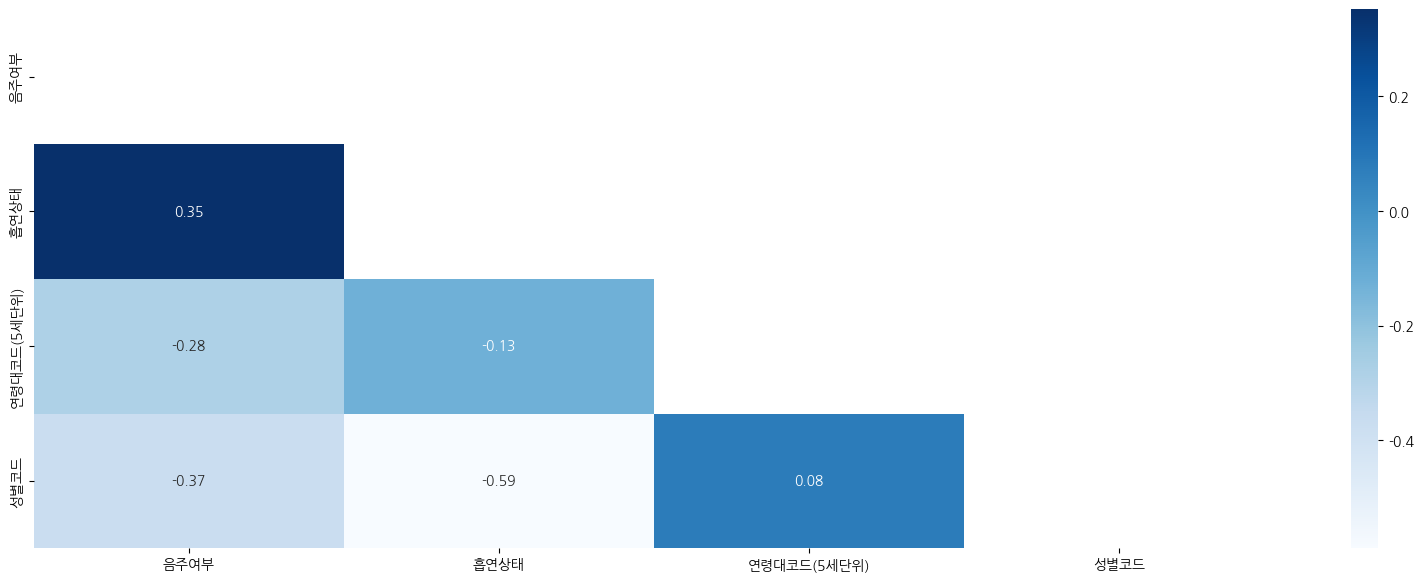

In [176]:
mask = np.triu(np.ones_like(df_corr, dtype=bool))
plt.figure(figsize=(20,7))

# Use heatmap to visualize the correlation
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="Blues", mask=mask)
plt.show()

### ✔ heatmap

: It is particularly useful for displaying the relationship between two variables or for showing a correlation matrix.


    Ex) `sns.heatmap(data, annot=True, cmap='coolwarm')`

  1) `data`: The data to be visualized, often a correlation matrix.

  2) `annot=True`: Adds the actual data values inside each cell.

    Ex) You can see the actual data values inside the heatmap like 0.35 and -0.28.

  3) `fmt=".2f"`: Rounds the values to two decimal places in the output.
  
  4) `cmap`: Specifies the color map (the color gradient used).

### ✔ mask

: is often used to hide or filter out certain parts of a dataset or a plot, typically using a boolean array.

In the context of visualization, it’s often used to create a mask for hiding parts of a heatmap, such as the upper triangle of a correlation matrix.

    Ex) mask = np.triu(np.ones_like(df_corr, dtype=bool))

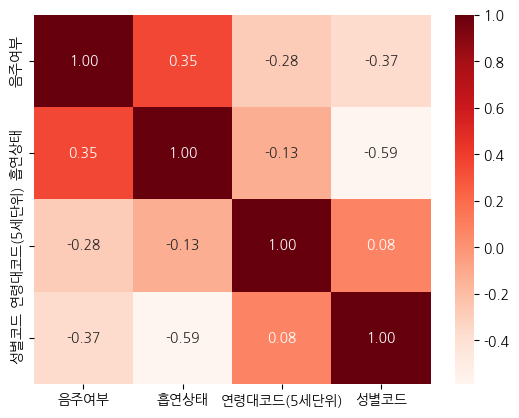

In [177]:
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="Reds")
plt.show()

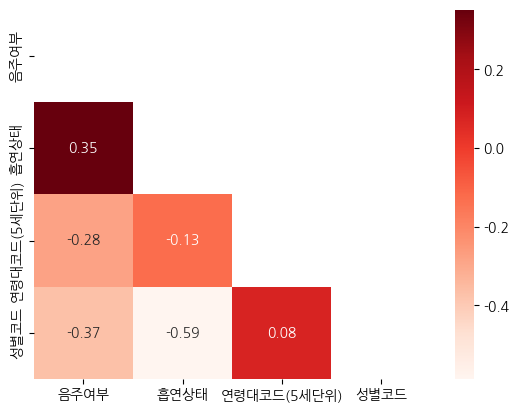

In [178]:
# Create a mask to hide the upper triangle of a correlation matrix
mask = np.triu(np.ones_like(df_corr, dtype=bool))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="Reds", mask=mask)
plt.show()

# **📌** Q3.

How much does the number of people who drink differ from that of people who smoke?

The data provided by health insurance is mostly in numeric format to reduce the data size.
You can use the replace function to convert these numeric values into their corresponding strings using the dictionary provided below.  
After converting the numbers to strings, calculate the crosstab for drinking and smoking, and find the counts for each category. Then, visualize the results.

While you could use groupby or pivot_table, you can also use the crosstab funciton in pandas, which, though not covered in the class, is relatively easy to use. Refer to the pandas documentation for pandas.crosstab to help you with this task. Finally, visualize the results using a bar graph.


🔽 Output Example

In [179]:
image_url = "https://cphinf.pstatic.net/mooc/20221101_84/16672988022419d7AD_PNG/mceclip2.png"
display(Image(url=image_url))

## Approach 1 - crosstab

In [180]:
# smoking 1(never smoked), 2(used to smoke, but quit), 3(currently smoking)
# drinking 0(does not drink), 1(drink)
smoke = {1 : "흡연안함", 2: "끊음", 3: "흡연중"}
drink = {0: "안마심", 1: "마심"}


In [181]:
df_q3 = df.copy()
# Replace the 'smoking' and 'drinking' columns with the corresponding string values from the 'smoke' and 'drink' dictionaries
# Store the string values in new columns
df_q3["흡연"] = df_q3["흡연상태"].replace(smoke)
df_q3["음주"] = df_q3["음주여부"].replace(drink)
df_q3[["흡연", "음주"]].head()


,흡연,음주
0,흡연중,안마심
1,흡연안함,안마심
2,흡연안함,안마심
3,흡연안함,마심
4,흡연중,안마심


In [182]:
df_crosstab = pd.crosstab(df_q3["음주"], df_q3["흡연"])
df_crosstab

흡연,끊음,흡연안함,흡연중
음주,,,
마심,120779,213743,162166
안마심,55334,394503,52845


### ✔ crosstab

: It is used to summarize the frequency of occurrences between combinations of categorical variables. Thus, it needs two arguments

    Ex) pd.crosstab(df['row'], df['column'])

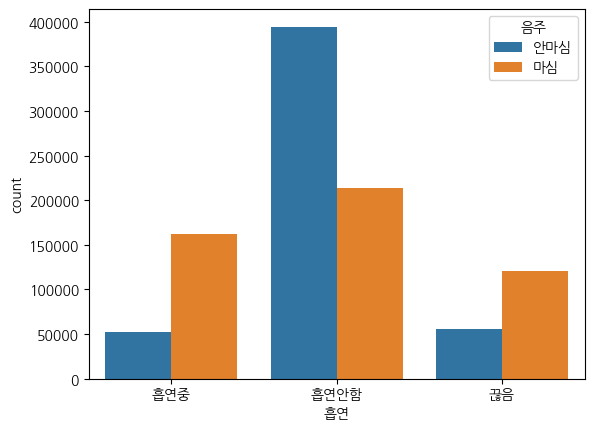

In [183]:
sns.countplot(x="흡연", data=df_q3, hue="음주")
plt.show()

### ✔ countplot

: displays the counts of observations in each categorical bin using bars

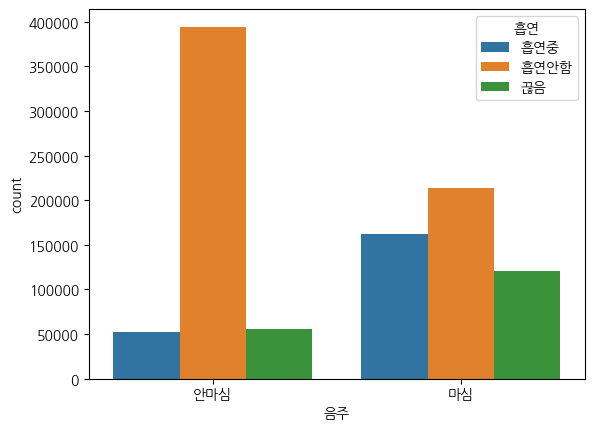

In [184]:
sns.countplot(x="음주", data=df_q3, hue="흡연")
plt.show()

## Approach 2 - pivot_table

In [185]:
df_q3 = df.replace({'음주여부':drink, '흡연상태':smoke})
df_q3


,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,13,46,170.0,65.0,91.0,1.0,1.2,...,25.0,흡연중,안마심,1,NaN,NaN,NaN,NaN,1.0,20181126
1,2017,2,2,8,41,150.0,45.0,73.4,1.2,1.0,...,10.0,흡연안함,안마심,1,NaN,NaN,NaN,NaN,1.0,20181126
2,2017,3,1,8,45,175.0,75.0,94.0,1.0,0.8,...,136.0,흡연안함,안마심,1,NaN,NaN,NaN,NaN,0.0,20181126
3,2017,4,2,12,11,155.0,55.0,67.5,0.9,1.0,...,30.0,흡연안함,마심,0,NaN,NaN,NaN,NaN,NaN,20181126
4,2017,5,1,8,41,175.0,75.0,93.0,1.5,1.5,...,68.0,흡연중,안마심,0,NaN,NaN,NaN,NaN,NaN,20181126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2017,999996,2,9,41,165.0,55.0,70.0,1.5,1.5,...,11.0,흡연안함,마심,0,NaN,NaN,NaN,NaN,NaN,20181126
999996,2017,999997,2,9,11,165.0,50.0,68.0,1.2,1.5,...,11.0,흡연안함,안마심,1,NaN,NaN,NaN,NaN,0.0,20181126
999997,2017,999998,2,12,27,155.0,50.0,83.8,0.2,1.0,...,12.0,흡연안함,안마심,1,NaN,NaN,NaN,NaN,0.0,20181126
999998,2017,999999,1,11,47,160.0,70.0,99.0,0.8,0.9,...,35.0,끊음,마심,0,NaN,NaN,NaN,NaN,NaN,20181126


In [186]:
df_pivot_table = df_q3.pivot_table(index="음주여부", values="흡연상태", aggfunc="count")
df_pivot_table


,흡연상태
음주여부,
마심,496688
안마심,502682


<Axes: xlabel='흡연상태', ylabel='count'>

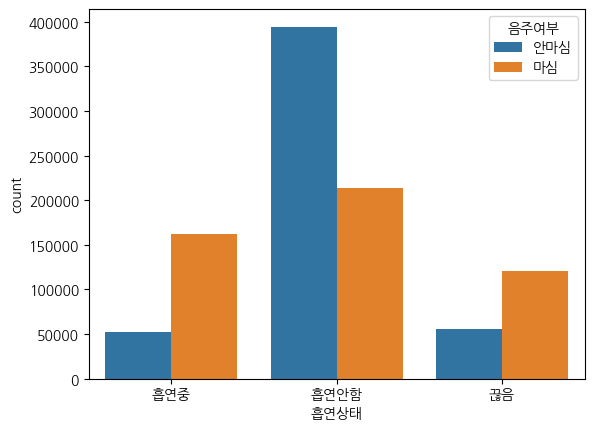

In [187]:
sns.countplot(data=df_q3, x='흡연상태', hue='음주여부')

### ✔ pivot_table

: displays the counts of observations in each categorical bin using bars

`index`: Specifies the column(s) to group by (similar to rows in a pivot table).

`values`: Specifies the column(s) to aggregate.

`aggfunc`: Defines the aggregation function to apply, such as mean, sum, count, etc.

    Ex) .pivot_table(index="column1", values="column2", aggfunc="count")

In [190]:
pivot_table_smoking_inx= df_q3.pivot_table(index="흡연상태", values="음주여부", aggfunc="count")
pivot_table_smoking_inx


,음주여부
흡연상태,
끊음,176113
흡연안함,608246
흡연중,215011


# **📌**  Q4.

Visualize data that includes individuals weighing more than 120kg in a scatter plot for "Total Cholesterol" and "Gamma-GTP" values, categorized by drinking status.

If a person's weight exceeds 120kg, they are considered obese and should manage their health. Find the data for individuals weighing 120kg or more and visualize the "Total Cholesterol" and "Gamma-GTP" values in a scatter plot, categorized by drinking status. (Ensure that 120kg is included in your selection.) Note that the appearance of the graph, including margins or the start and end points of the regression line, may vary depending on graph settings and the seaborn version used.


🔽 Output Example

In [191]:
image_url = "https://cphinf.pstatic.net/mooc/20221101_189/166729889374024nTM_PNG/mceclip3.png"
display(Image(url=image_url))

## Approach

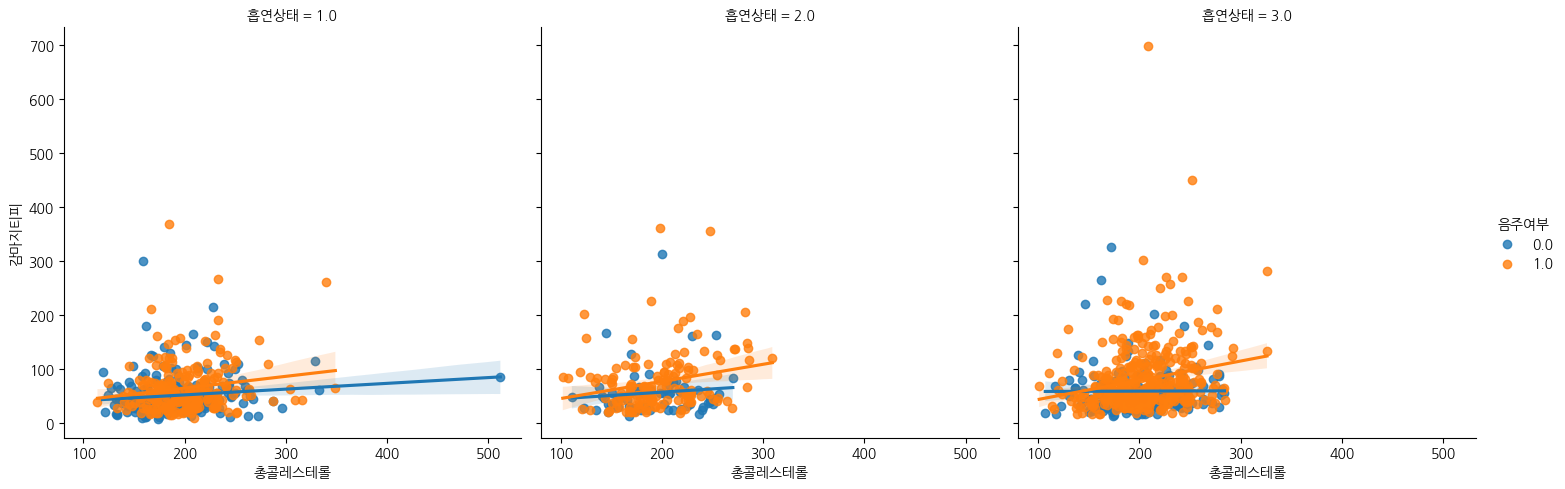

In [193]:
# filter data that only includes more than 120 in weight column
df_filtered = df[df["체중(5Kg 단위)"] >= 120]

# Use lmplot to plot the filered dataset
sns.lmplot(data=df_filtered, x='총콜레스테롤', y='감마지티피', hue='음주여부', col='흡연상태')
plt.show()

### ✔ lmplot()

: is used to create scatter plots with an optional linear regression model fit. It is particularly useful for visualizing the relationship between two continuous variables and optionally categorizing by another variable.


- hue: (Optional) Categorical variable to color the points by different groups.

- col or row: (Optional) Variables that define subsets of the data.

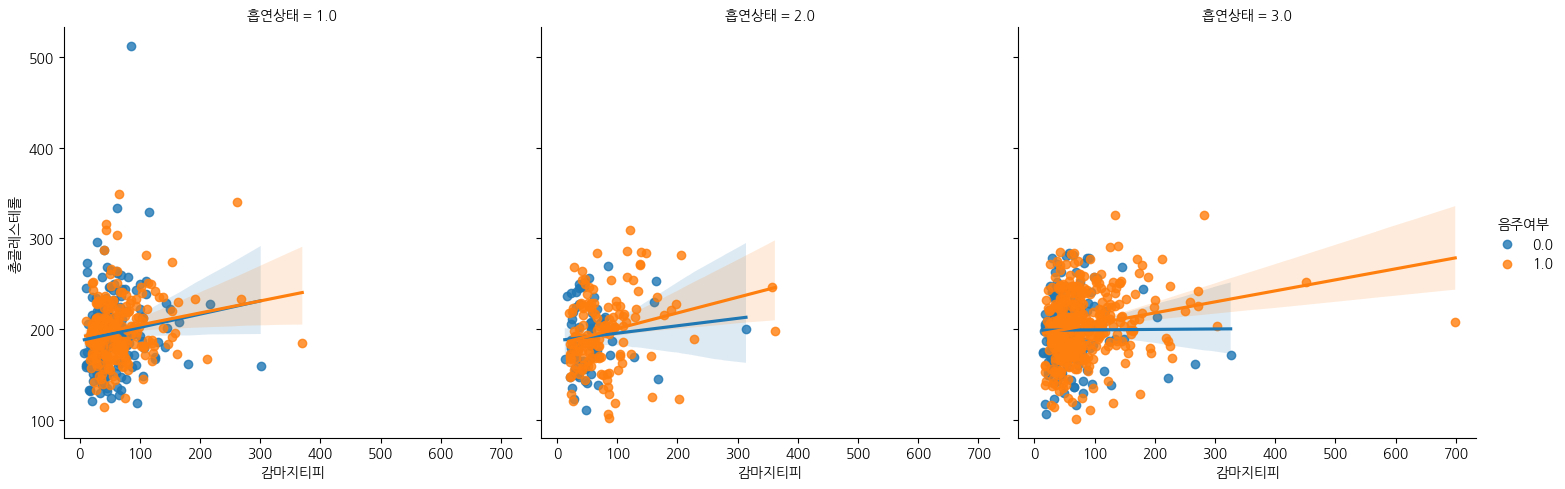

In [194]:
sns.lmplot(data=df_filtered, x='감마지티피', y='총콜레스테롤', hue='음주여부', col='흡연상태')
plt.show()

### ✔ scatterplot()

:  It’s particularly useful for visualizing the relationship or correlation between two continuous variables.

smoking categories:  [3. 2. 1.]
After removing NaN values from smoking categories:  [3. 2. 1.]


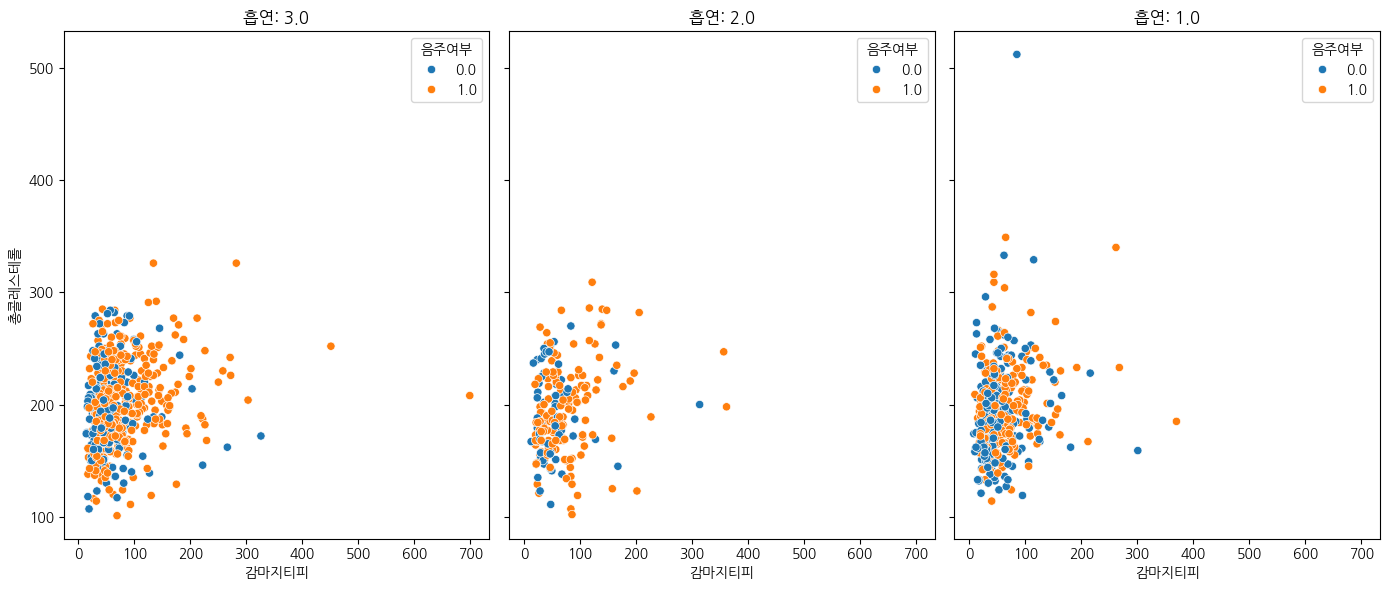

In [195]:
# Sort and clean categories of '흡연' column in the filtered data
smoking_categories = df_filtered['흡연상태'].unique()
print("smoking categories: ", smoking_categories)
# Remove NaN values from the NumPy array
smoking_categories = smoking_categories[~pd.isnull(smoking_categories)]
print("After removing NaN values from smoking categories: ", smoking_categories)
# Create subplots with one row and as many columns as there are unique smoking statuses
fig, axes = plt.subplots(1, len(smoking_categories), figsize=(14, 6), sharex=True, sharey=True)
# Loop over the unique categories and create a scatter plot for each
for i, category in enumerate(smoking_categories):
    filtered_data = df_filtered[df_filtered['흡연상태'] == category]
    sns.scatterplot(ax=axes[i], data=filtered_data,
                    x='감마지티피', y='총콜레스테롤', hue='음주여부')
    axes[i].set_title(f'흡연: {category}')
    axes[i].set_xlabel('감마지티피')
    axes[i].set_ylabel('총콜레스테롤')

plt.tight_layout()
plt.show()

# **📌** Q5.

How much does vision differ by age group? Visualize the average left and right eye vision by age group and gender.

Vision is recorded with values ranging from 0.1 to 2.5, with vision below 0.1 being recorded as 0.1, and blindness being recorded as 9.9.

Including data with blindness in the average would make it difficult to accurately calculate the average vision. Therefore, please exclude the data with blindness and calculate the average left and right eye vision by age group and gender.

Visualize the results using subplots, and feel free to refer to the following video on how to use matplotlib: https://www.youtube.com/watch?v=ZTRKojTLE8M.

The provided visualization example is just for reference. It’s fine if your style or font is different, as long as the average left and right eye vision by age group and gender is visualized.



🔽 Output Example

In [196]:
image_url = "https://cphinf.pstatic.net/mooc/20221109_263/1667993587445eNXP3_PNG/mceclip0.png"
display(Image(url=image_url))

## Approach

In [197]:
# Remove rows with missing values in specified columns
df_q5 = df.dropna(subset=['연령대코드(5세단위)', '성별코드', '시력(좌)', '시력(우)']).copy()

In [198]:
# Remove rows with 9.9 (blindness) in specified columns
df_q5_vision = df_q5[(df_q5['시력(좌)'] != 9.9) & (df_q5['시력(우)'] != 9.9)].copy()

In [199]:
# Convert the keys of the age_code dictionary into corresponding values in the '연령대' column
df_q5_vision['연령대'] = df_q5_vision['연령대코드(5세단위)'].map(age_code)

In [200]:
# Filter the data to include only rows where both left and right eye vision are less than or equal to 2.5
df_filtered = df_q5_vision[(df_q5_vision['시력(좌)'] <= 2.5) & (df_q5_vision['시력(우)'] <= 2.5)]

In [201]:
# Calculate the average left and right eye vision by age group and gender
df_grouped = df_filtered.groupby(['연령대', '성별코드']).agg({'시력(좌)': 'mean', '시력(우)': 'mean'}).reset_index()

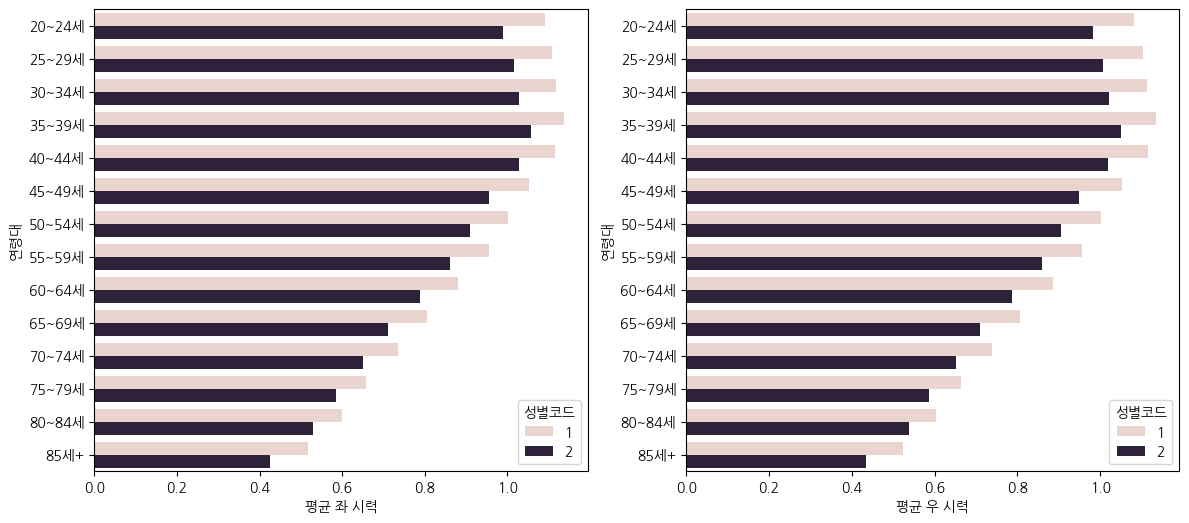

In [202]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.barplot(data=df_grouped, x='시력(좌)', y='연령대', hue='성별코드', ax=axes[0])
axes[0].set_xlabel('평균 좌 시력')
axes[0].set_ylabel('연령대')

sns.barplot(data=df_grouped, x='시력(우)', y='연령대', hue='성별코드', ax=axes[1])
axes[1].set_xlabel('평균 우 시력')
axes[1].set_ylabel('연령대')

plt.show()

### ✔ .dropna()

: It allows you to drop rows or columns that contain missing values, depending on your needs.

In [203]:
print("Original DataFrame missing values:")
print(df.isnull().sum().sum())

df_q5 = df.dropna(subset=['연령대코드(5세단위)', '성별코드', '시력(좌)', '시력(우)']).copy()
print("\nAfter removing rows with missing values in specified columns:")
print(df_q5.isnull().sum().sum())

print("\nMissing values in '연령대코드(5세단위)' columns:")
print(df['연령대코드(5세단위)'].isnull().sum().sum())

df_drop = df.dropna(subset=['성별코드', '시력(좌)', '시력(우)']).copy()
print("\nAfter removing rows with missing values in 'Gender Code', 'Vision (Left)', and 'Vision (Right)' only:")
print(df_drop.isnull().sum().sum())


Original DataFrame missing values:
4612274

After removing rows with missing values in specified columns:
4609519

Missing values in '연령대코드(5세단위)' columns:
0

After removing rows with missing values in 'Gender Code', 'Vision (Left)', and 'Vision (Right)' only:
4609519


### ✔ .subplots()

: This function is particularly useful when you want to create multiple plots within a single figure, arranged in a grid.

    Ex) fig, axes = plt.subplots(nrow = 1, ncols = 2, figsize=(14, 6))

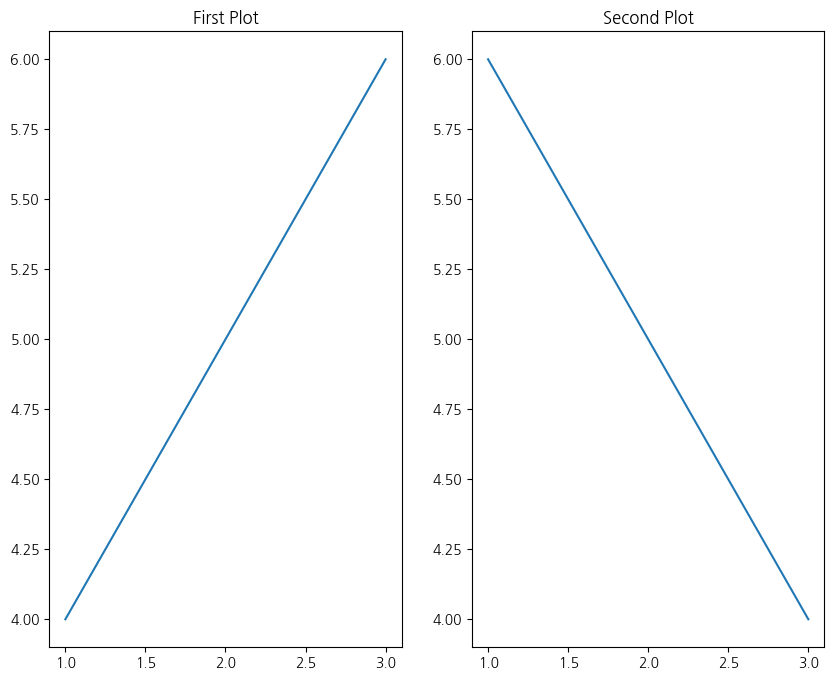

In [204]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))
axes[0].plot([1, 2, 3], [4, 5, 6])
axes[0].set_title('First Plot')

axes[1].plot([1, 2, 3], [6, 5, 4])
axes[1].set_title('Second Plot')

plt.show()